In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set(style='white', rc = {'figure.figsize':(30,12)})
%matplotlib inline

# Datenüberblick

In [2]:
df = pd.read_csv('data/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [5]:
df.shape

(85, 13)

In [6]:
df = df.sort_values(by='winpercent', ascending=False)
df = df.reset_index(drop=True)
df['sugarpercent'] = 100 * df['sugarpercent']
df['pricepercent'] = 100 * df['pricepercent']

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.000000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.000000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.000000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.000000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.000000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.000000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.000000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.000000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.000000
sugarpercent,85.0,47.864705,28.277787,1.100000,22.000000,46.500000,73.199999,98.799998


# Eda

<AxesSubplot: xlabel='winpercent', ylabel='competitorname'>

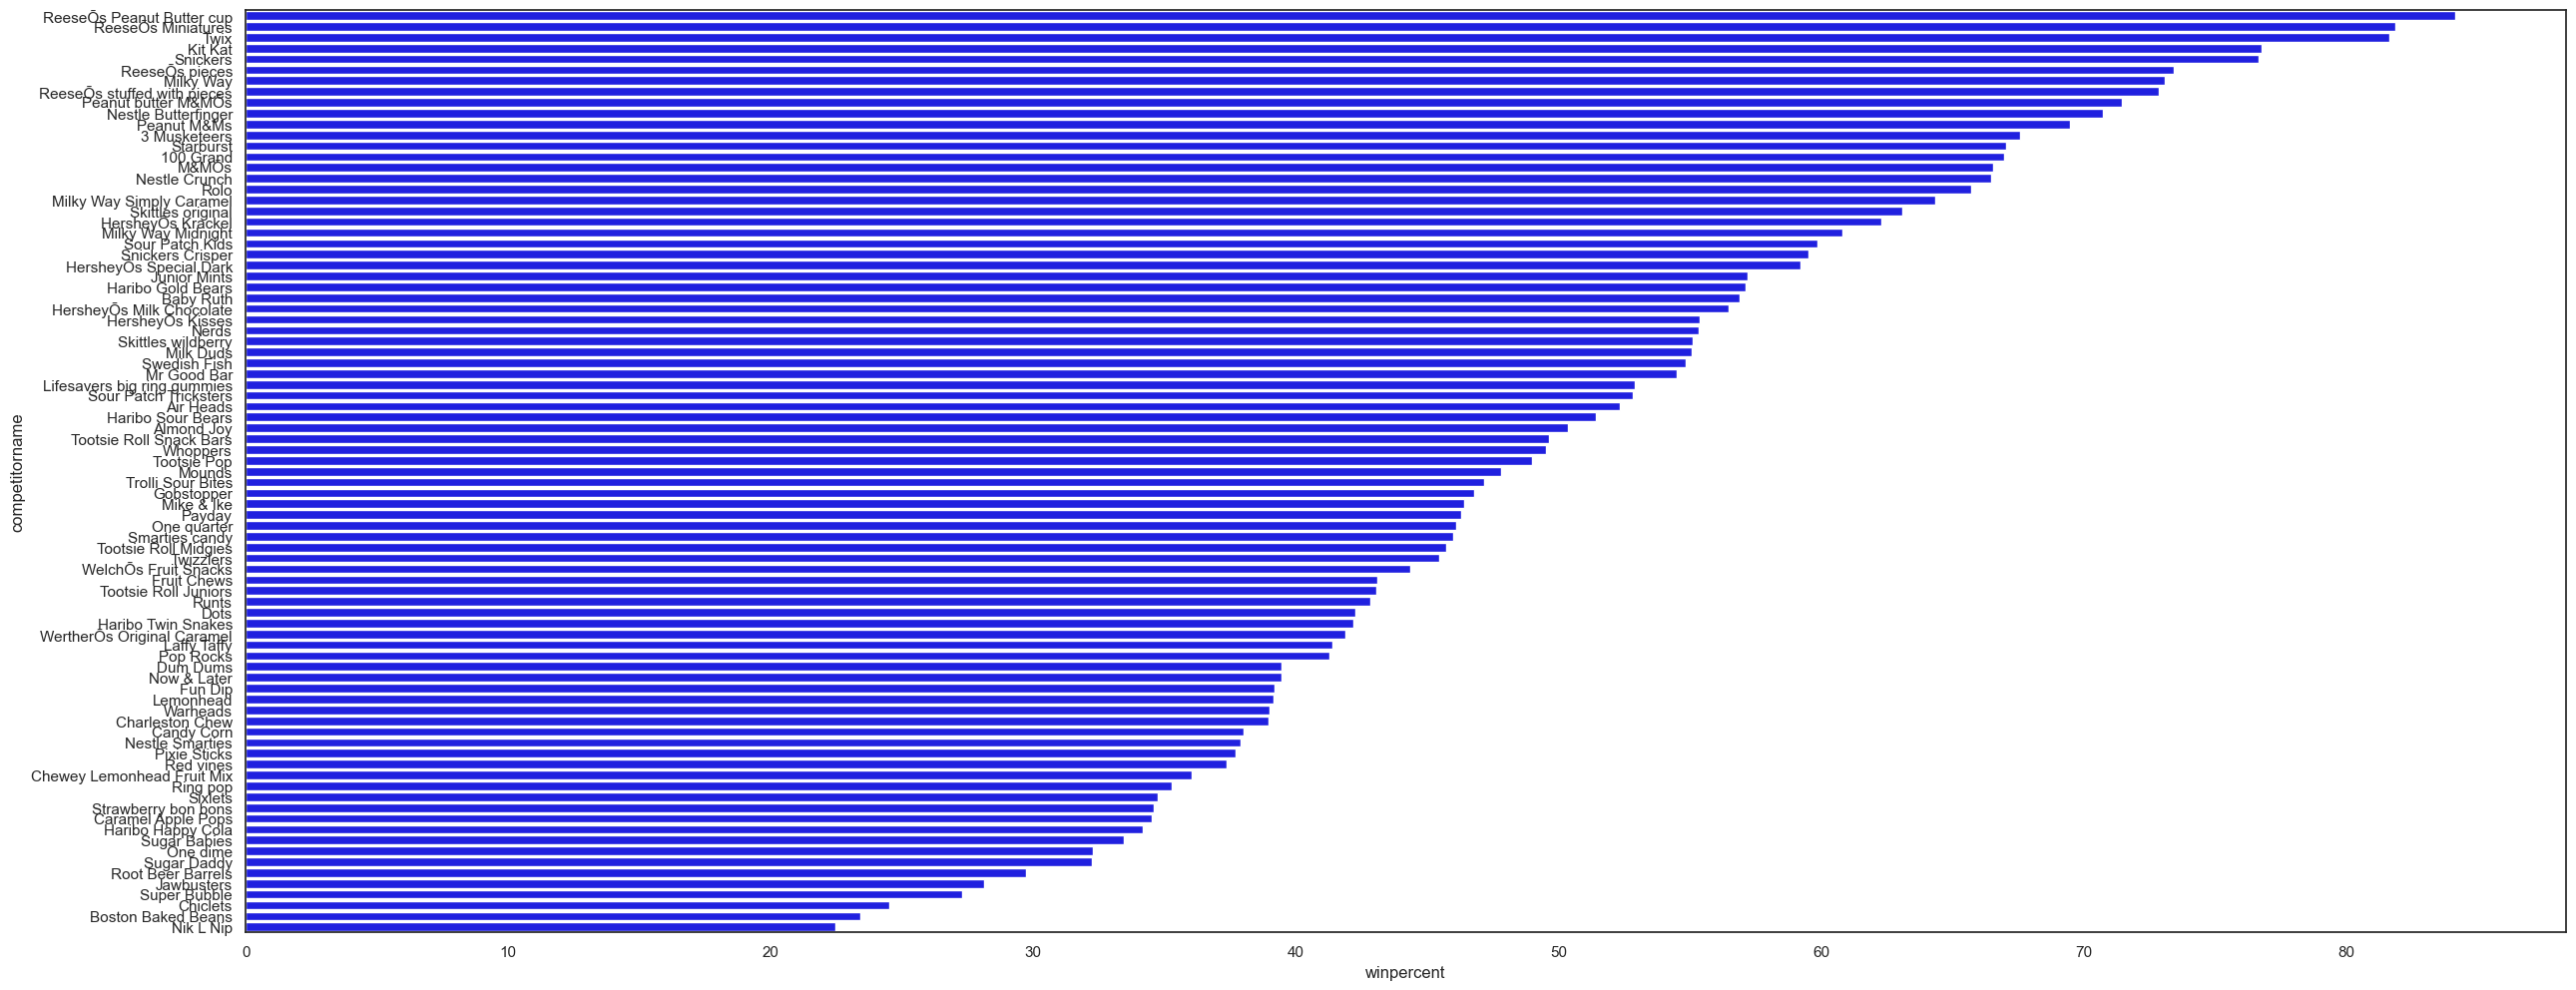

In [28]:
sns.barplot(data=df,  y='competitorname', x='winpercent', orient='h', color='blue')

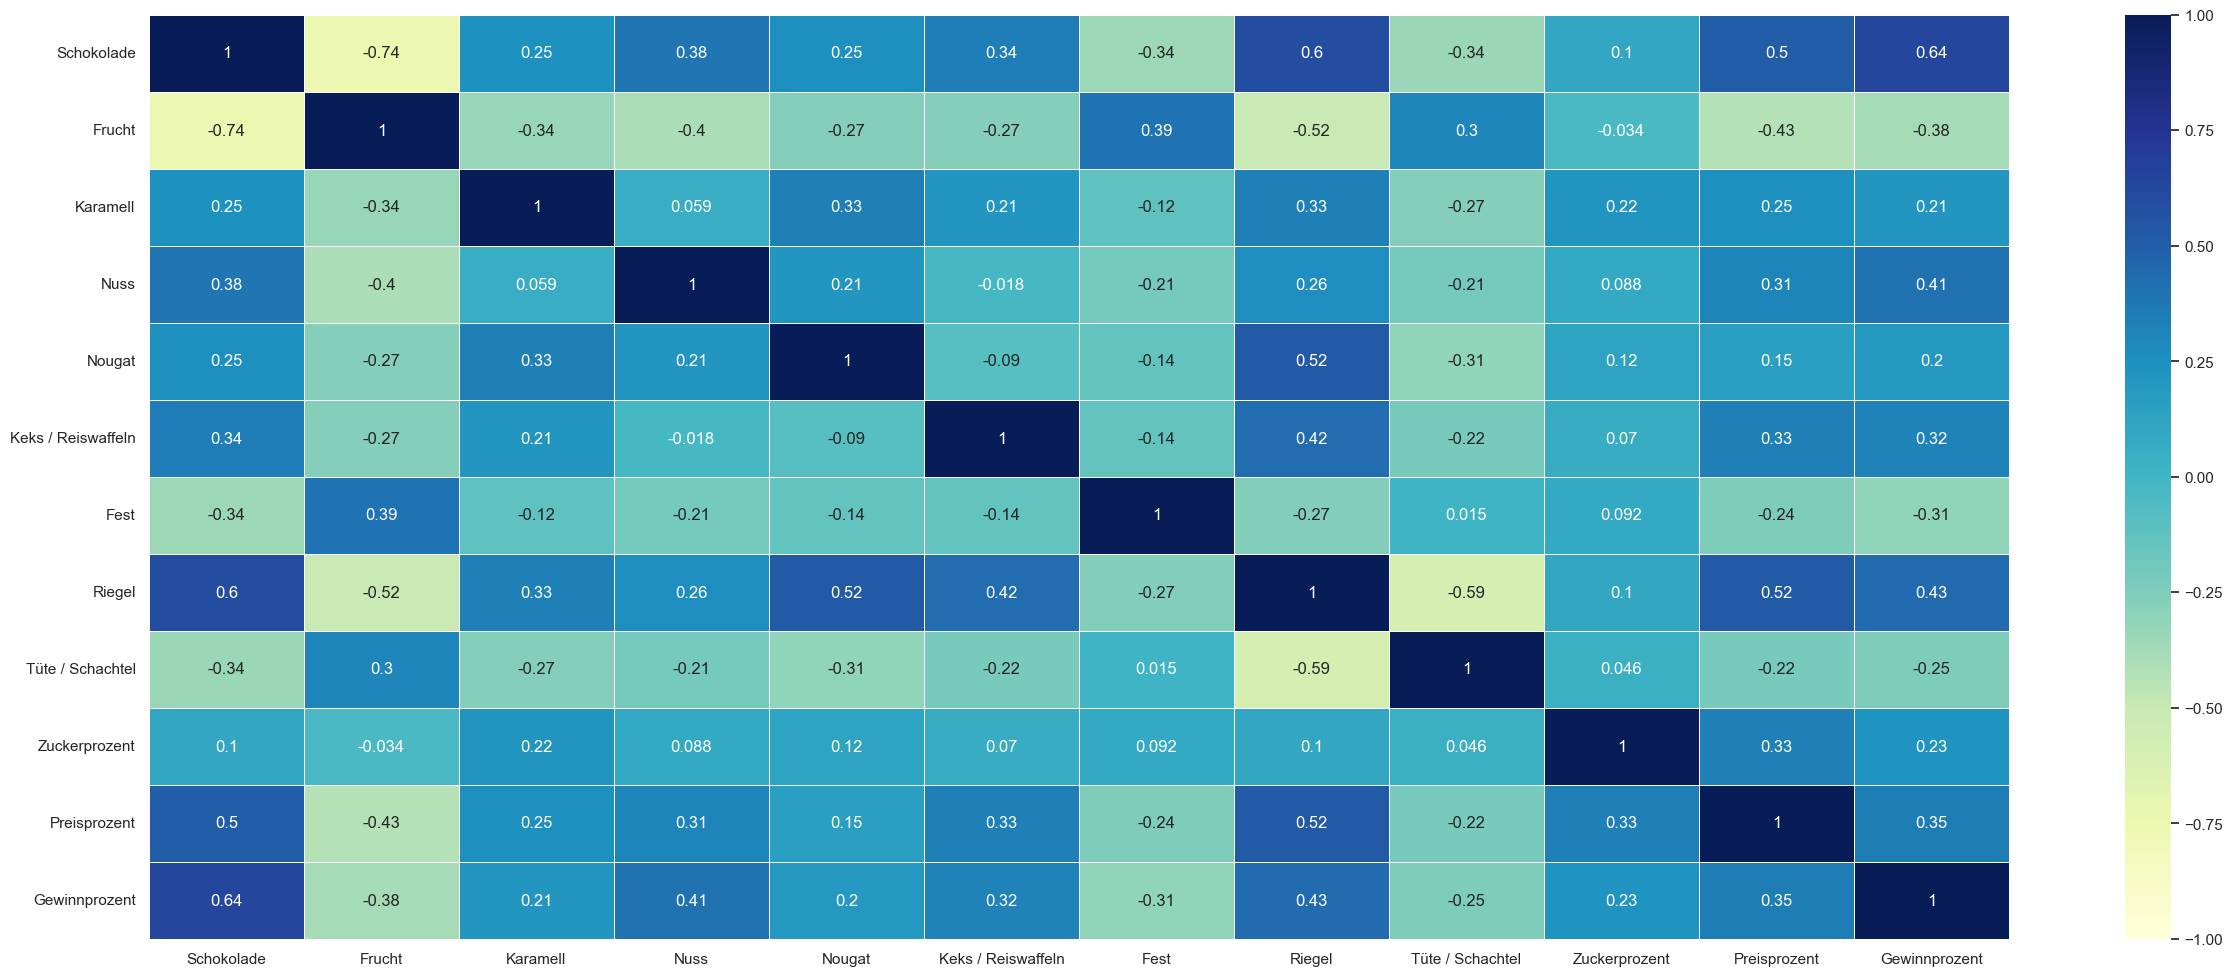

In [8]:
taste_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']
taste_leg = ["Schokolade", "Frucht", "Karamell", "Nuss", "Nougat", "Keks / Reiswaffeln"]
taste_color = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

shape_cols = ['hard', 'bar', 'pluribus']
shape_leg = ["Fest", "Riegel", "Tüte / Schachtel"]
shape_color = ['gray', 'olive', 'cyan'] #taste_color[0:3]

heatmap_leg = taste_leg + shape_leg + ["Zuckerprozent", "Preisprozent", "Gewinnprozent"]

df_corr = df.corr(method='pearson', numeric_only=True)

sns.heatmap(data=df_corr, annot=True, vmin=-1, vmax=1, linewidths=.5, xticklabels=heatmap_leg, yticklabels=heatmap_leg, cmap='YlGnBu')
plt.show()

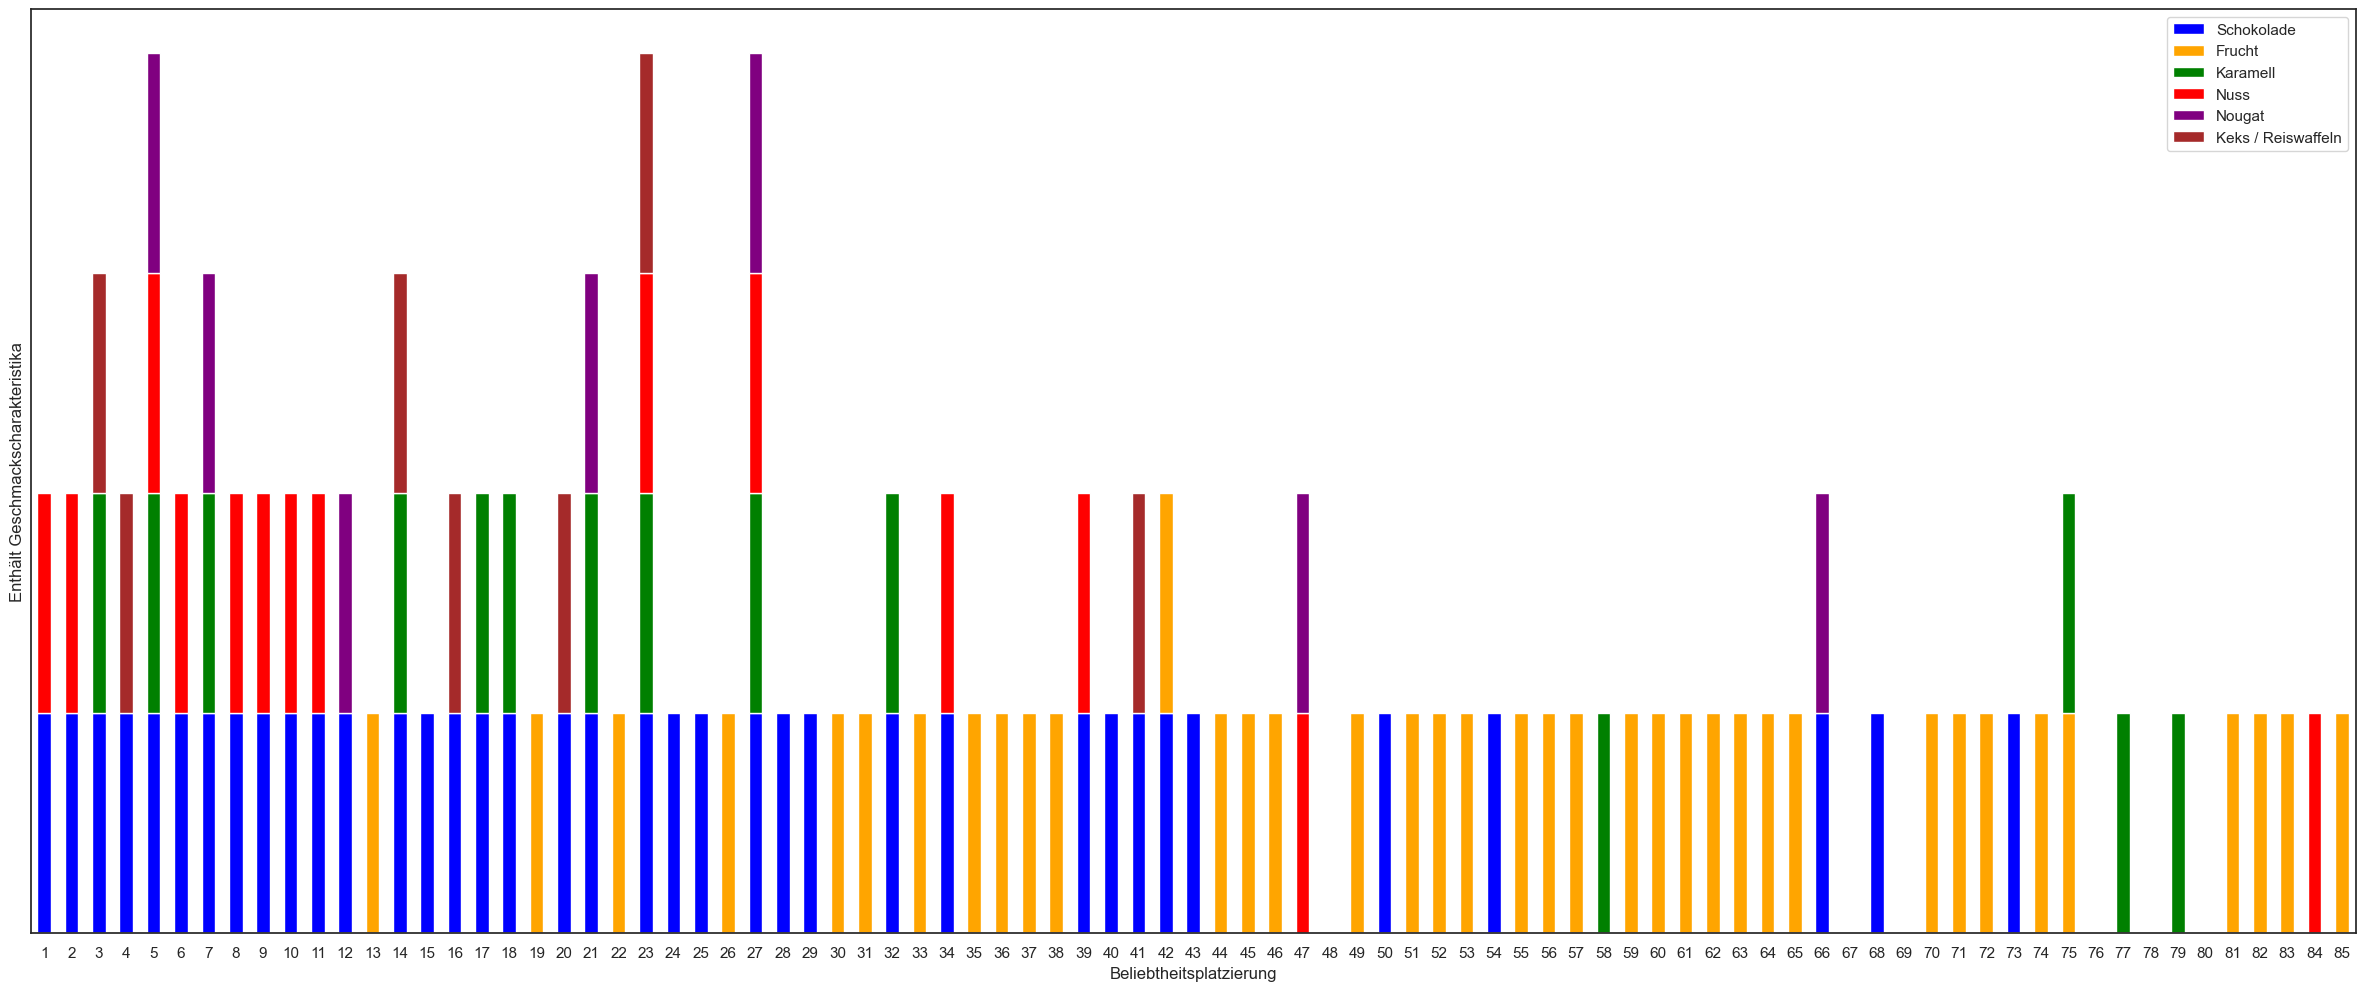

In [9]:
df['ranking'] = range(1, df.shape[0] +1)

drop_cols = shape_cols + ['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']
df_taste = df.drop(drop_cols, axis=1)

df_taste.plot(kind='bar', x='ranking', stacked=True, color=taste_color)
plt.xticks(rotation=0)
plt.xlabel("Beliebtheitsplatzierung")
plt.ylabel("Enthält Geschmackscharakteristika")
plt.yticks([])
plt.legend(taste_leg)
plt.show()

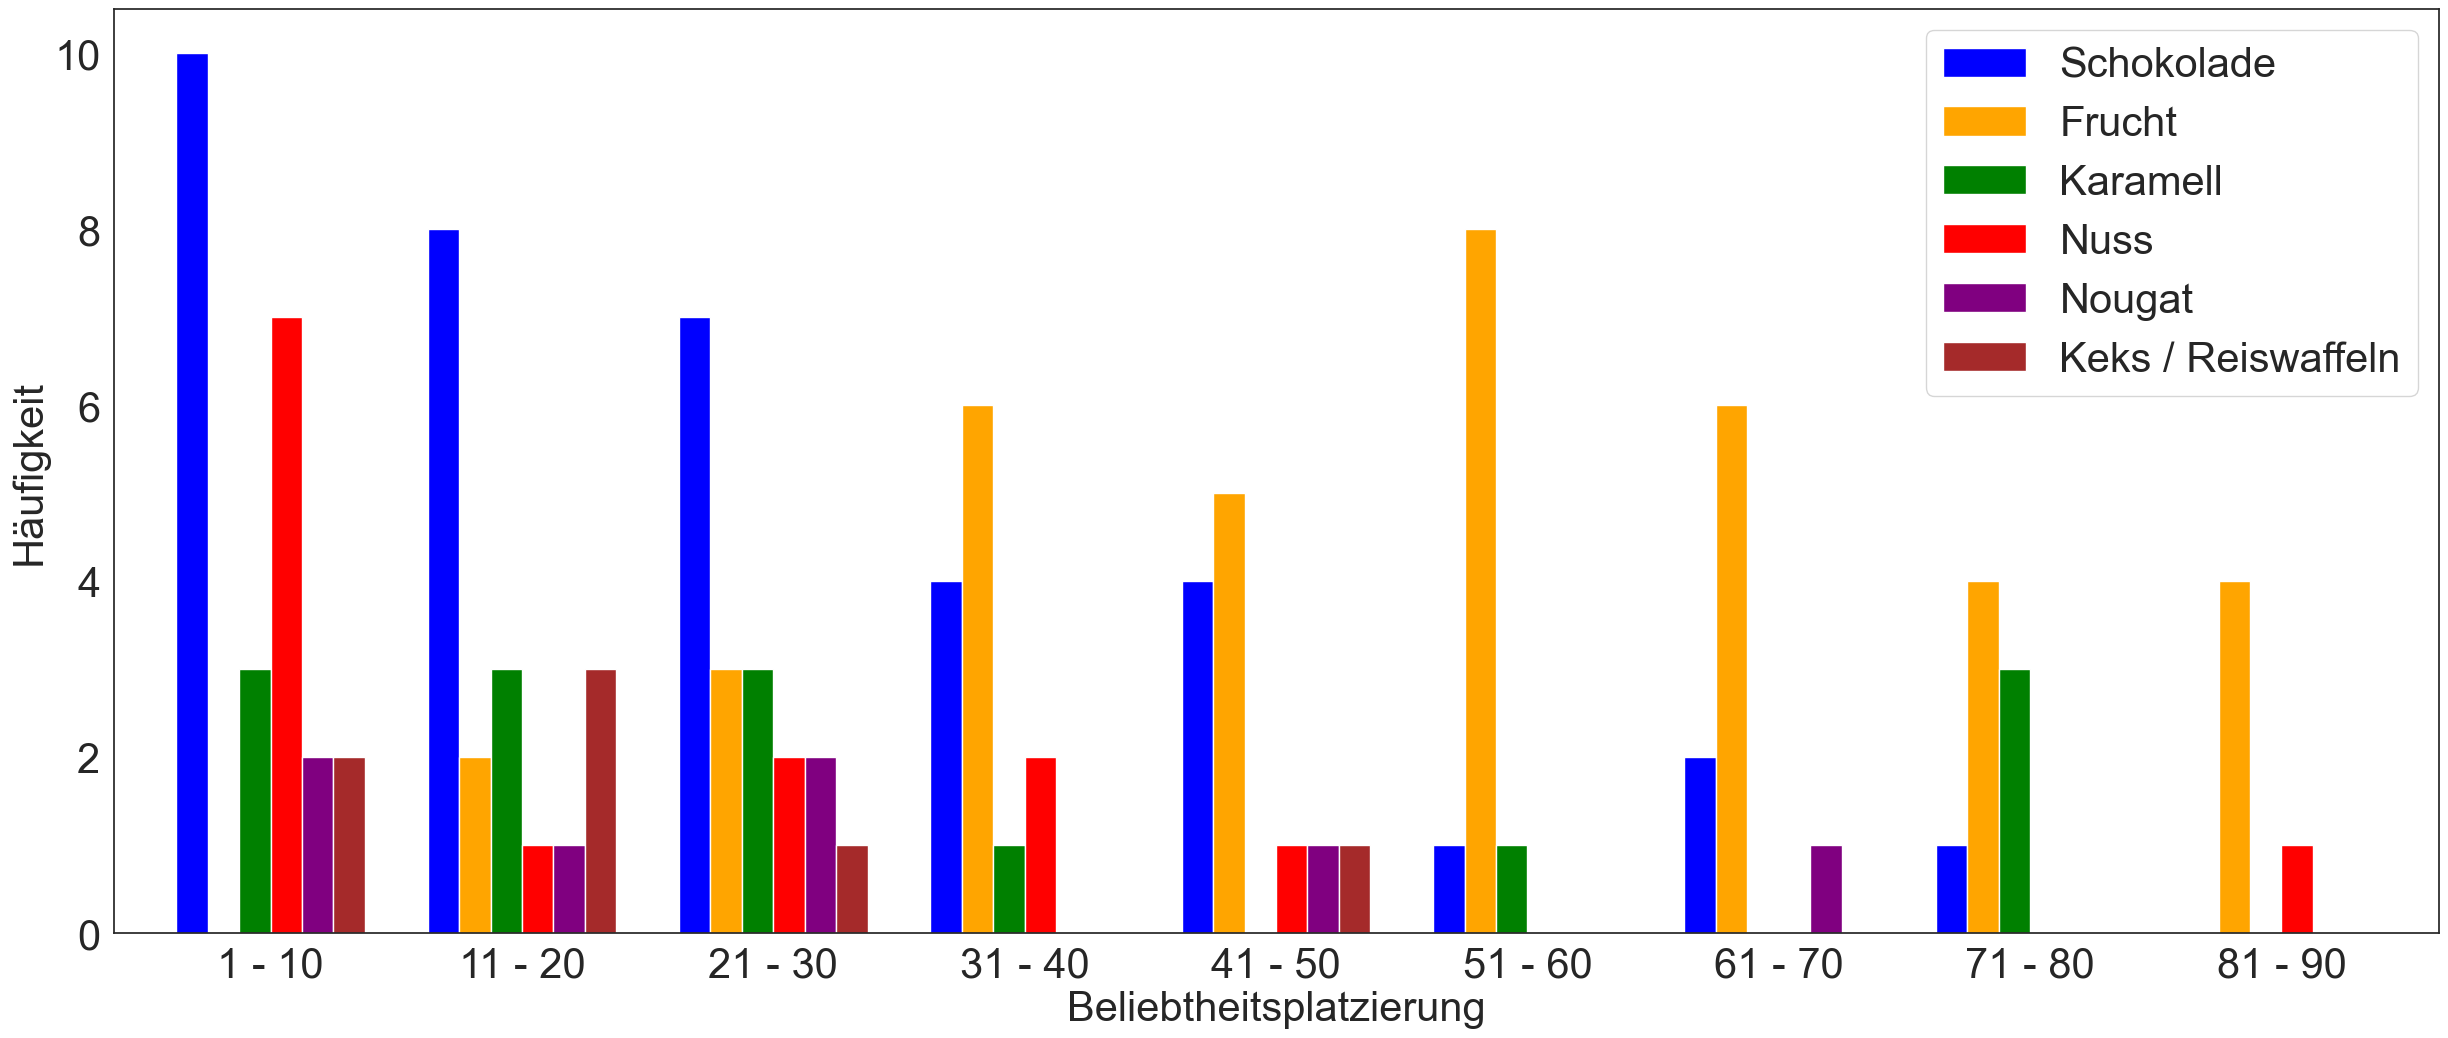

In [39]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
xticks = ["1 - 10", "11 - 20", "21 - 30", "31 - 40", "41 - 50", "51 - 60", "61 - 70", "71 - 80", "81 - 90"]
df_taste_grouped = df_taste.groupby(pd.cut(df_taste['ranking'], bins)).sum()
df_taste_grouped = df_taste_grouped.drop(['ranking'], axis=1)

df_taste_grouped.plot(kind='bar', color=taste_color, width = 0.75)
plt.xticks(range(0,9), xticks, rotation=0, fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("Häufigkeit", fontsize=30)
plt.xlabel("Beliebtheitsplatzierung", fontsize=30)
plt.legend(taste_leg, fontsize=30)
plt.savefig('test.png', bbox_inches='tight')

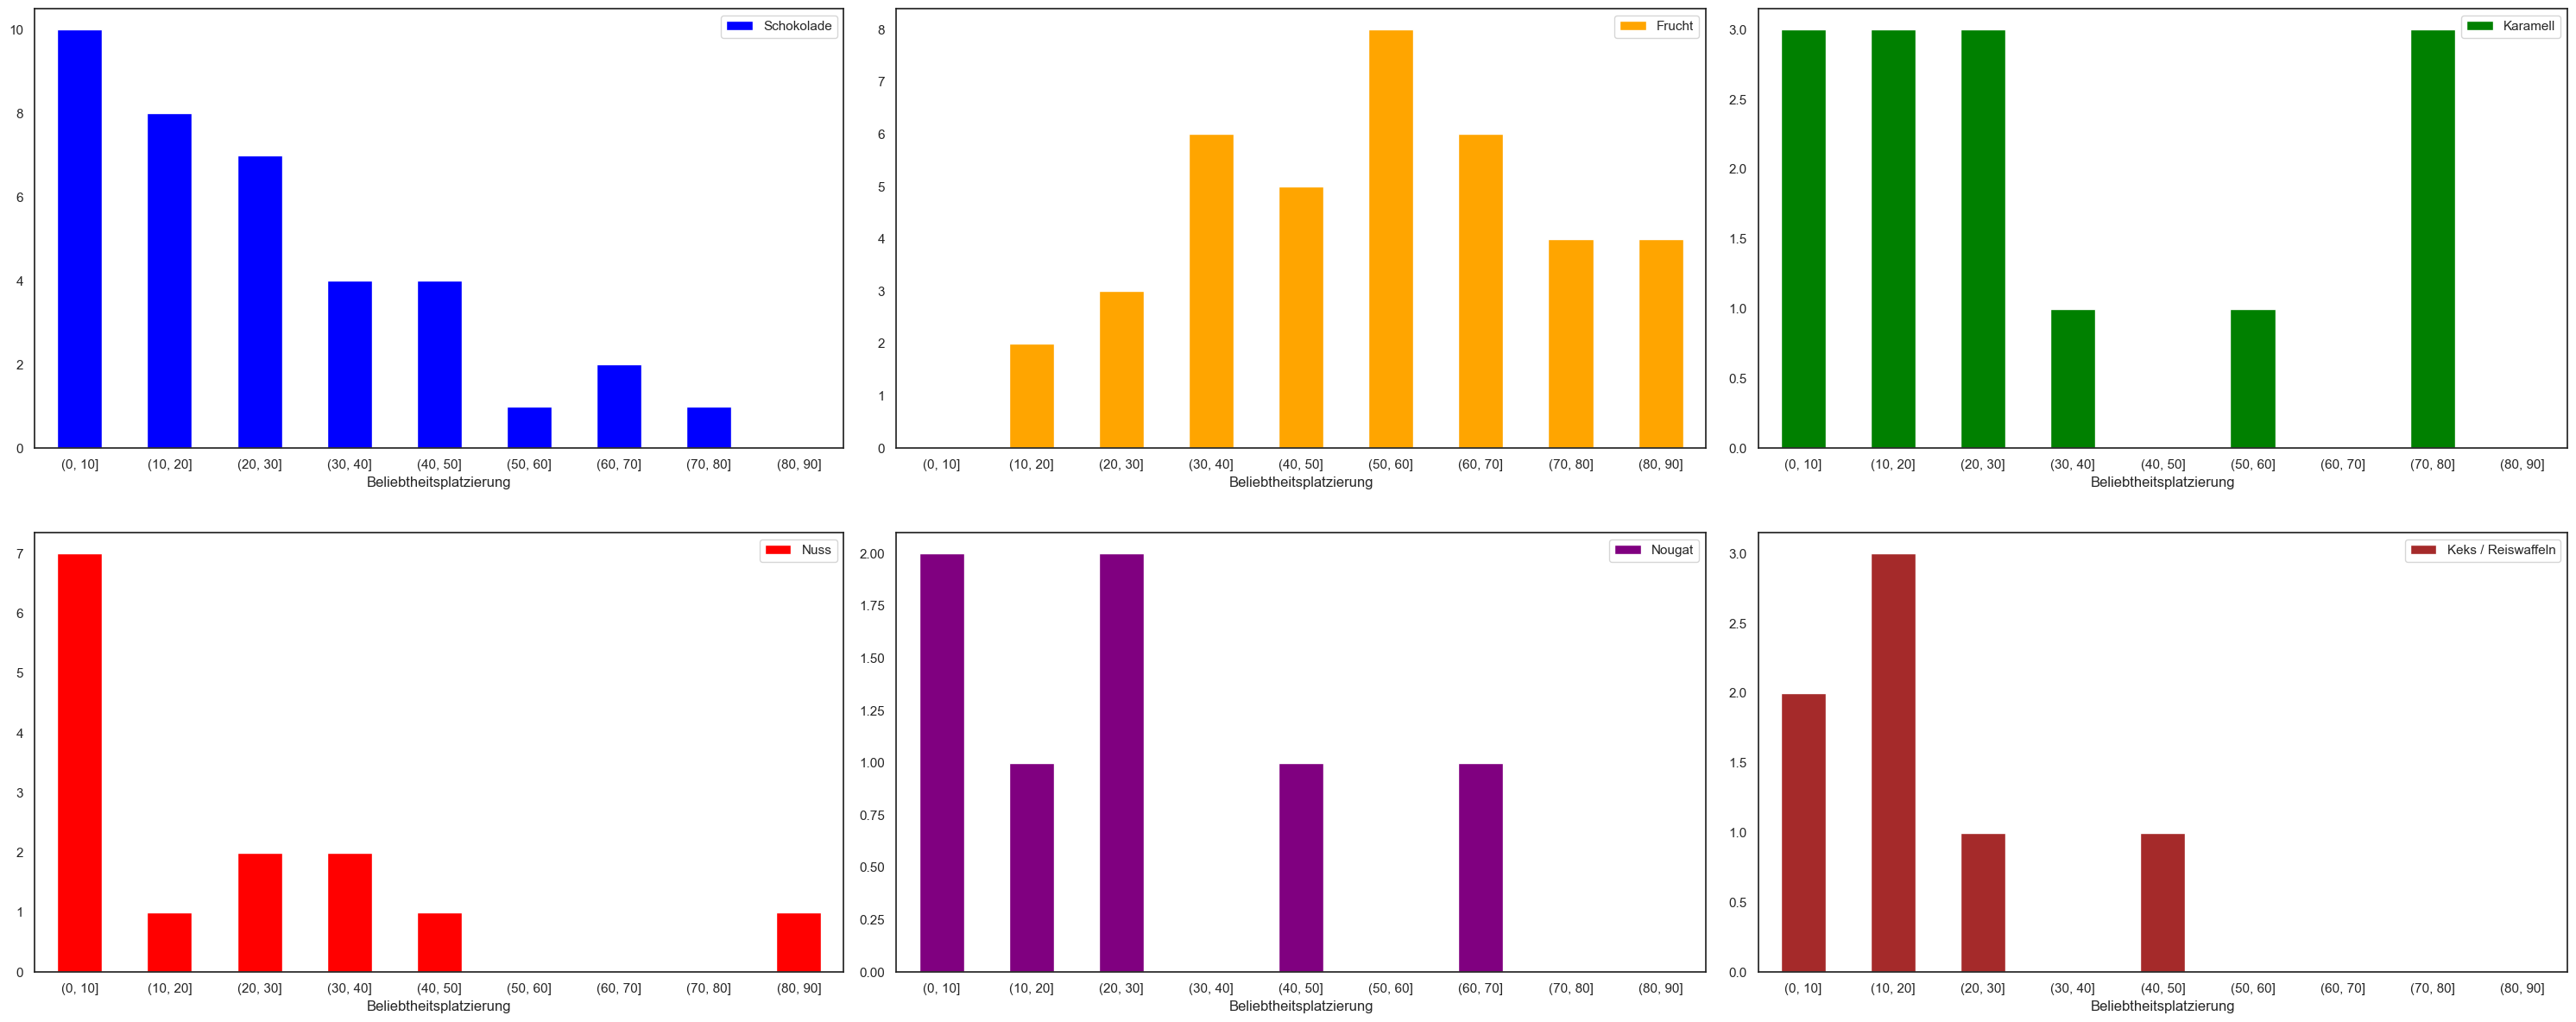

In [11]:
for index, col in enumerate(taste_cols):
    ax = plt.subplot(2, 3, index+1)
    df_taste_grouped[col].plot(kind='bar', color=taste_color[index], label=taste_leg[index])
    plt.xticks(rotation=0)
    plt.xlabel("Beliebtheitsplatzierung")
    plt.legend()
    
plt.tight_layout(h_pad=3)
plt.savefig('test2.png', bbox_inches='tight')

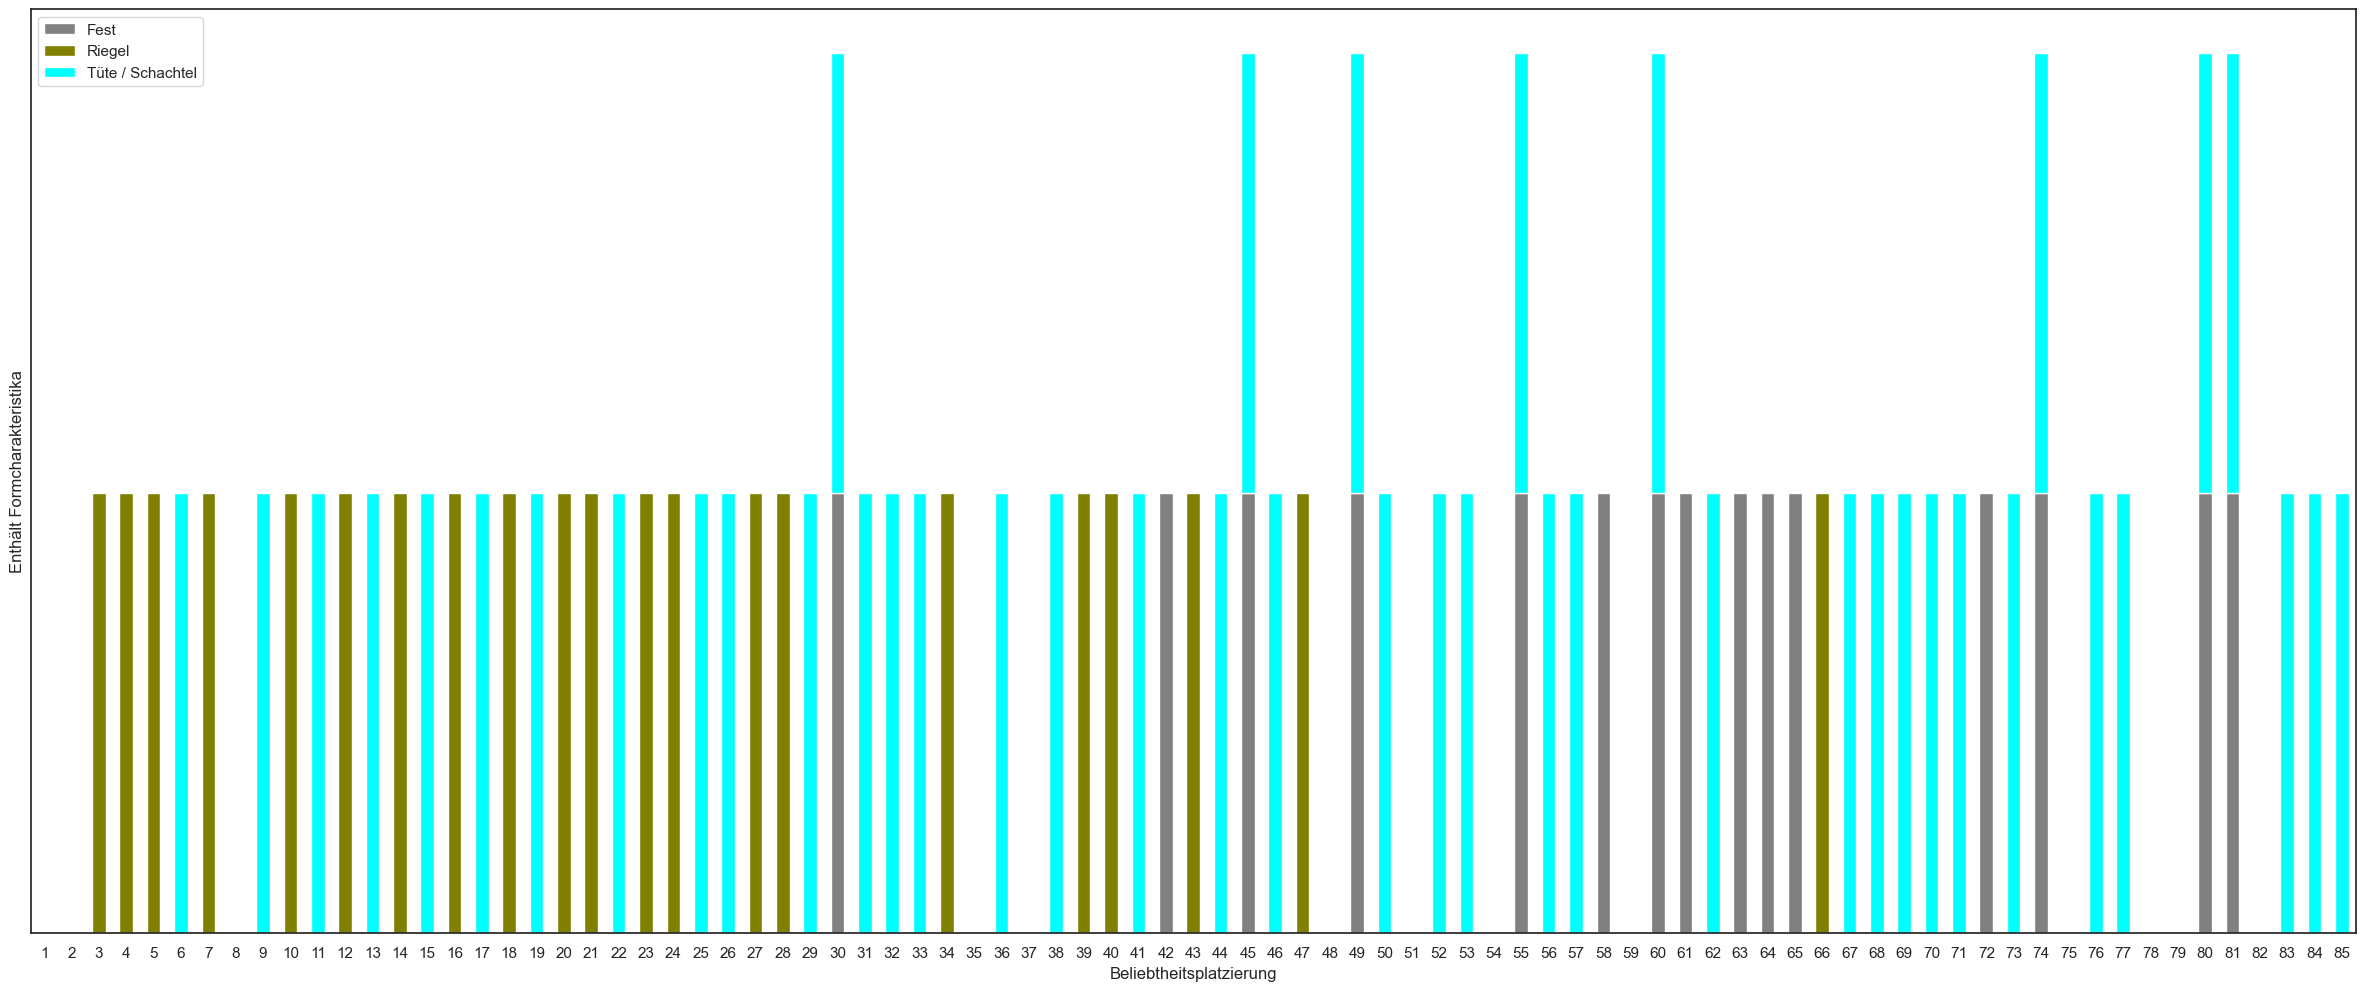

In [12]:
drop_cols = taste_cols + ['competitorname', 'sugarpercent', 'pricepercent', 'winpercent']
df_shape = df.drop(drop_cols, axis=1)

df_shape.plot(kind='bar', x='ranking', stacked=True, color=shape_color)
plt.xticks(rotation=0)
plt.xlabel("Beliebtheitsplatzierung")
plt.ylabel("Enthält Formcharakteristika")
plt.yticks([])
plt.legend(shape_leg)

plt.show()

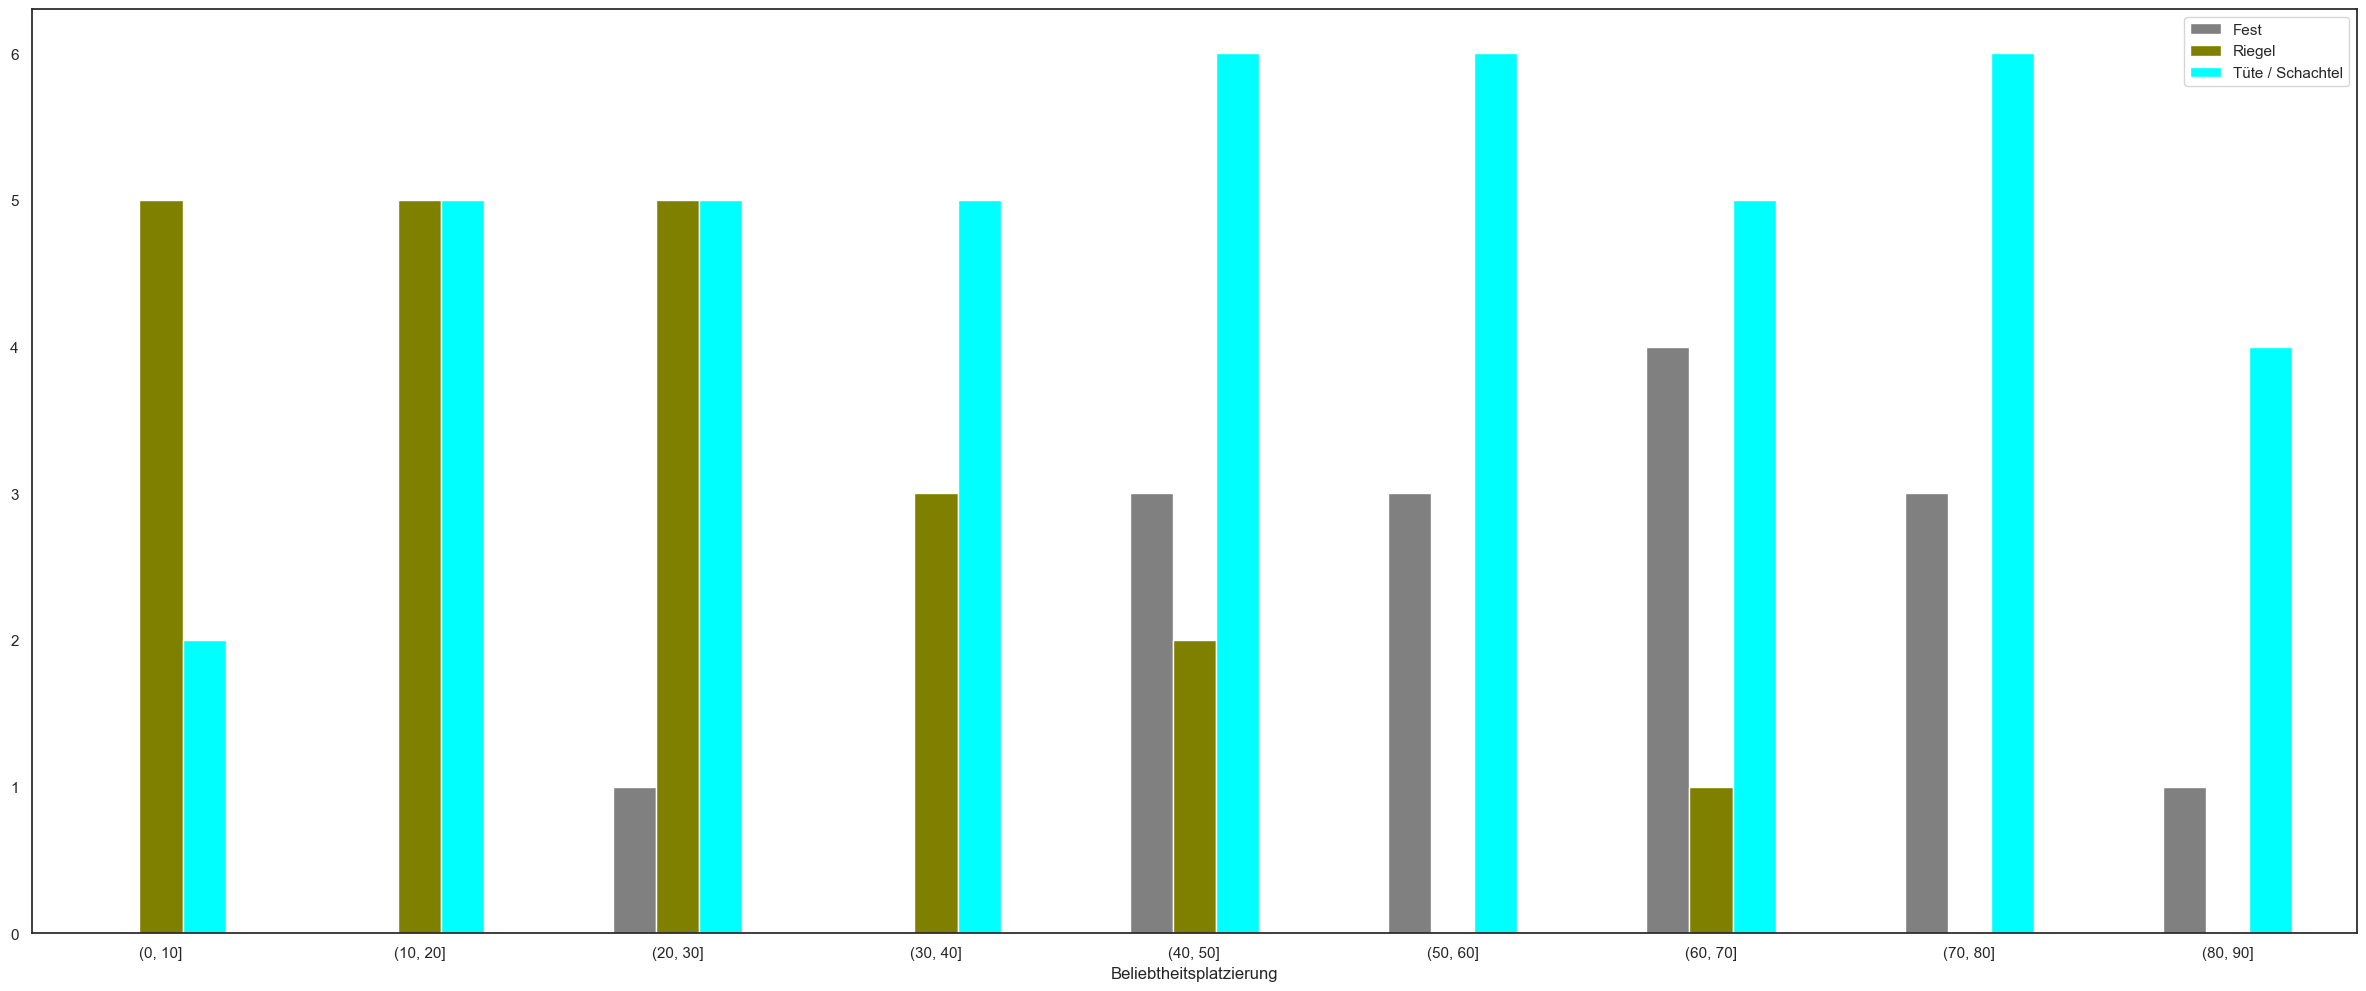

In [13]:
df_shape_grouped = df_shape.groupby(pd.cut(df_shape['ranking'], bins)).sum()
df_shape_grouped = df_shape_grouped.drop(['ranking'], axis=1)

df_shape_grouped.plot(kind='bar', color=shape_color)
plt.xticks(rotation=0)
plt.xlabel("Beliebtheitsplatzierung")
plt.legend(shape_leg)
plt.savefig('test3.png', bbox_inches='tight')

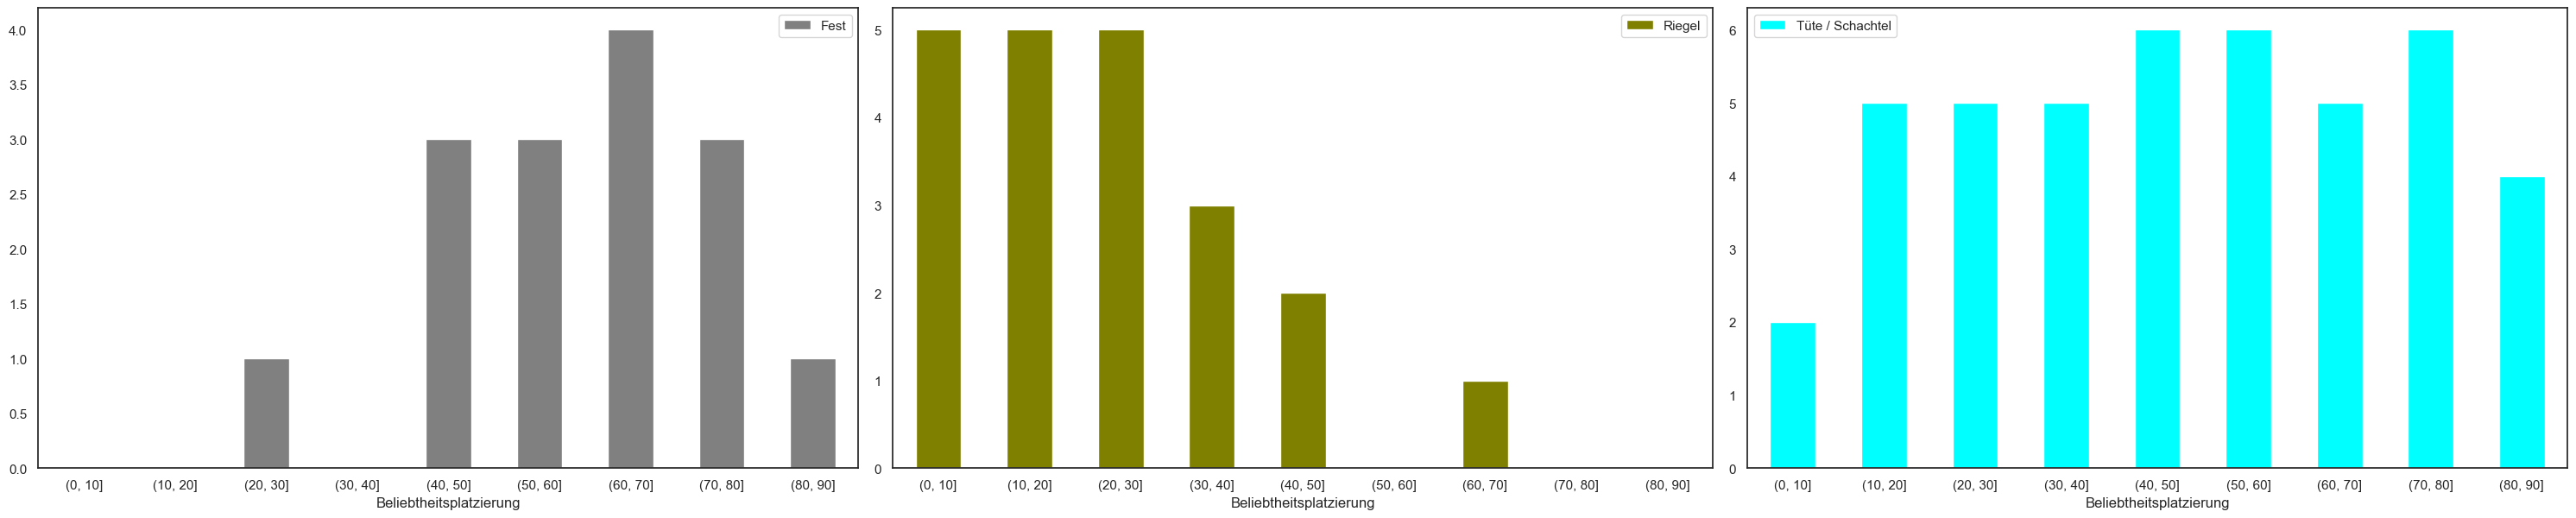

In [14]:
for index, col in enumerate(shape_cols):
    ax = plt.subplot(2, 3, index+1)
    df_shape_grouped[col].plot(kind='bar', color=shape_color[index], label=shape_leg[index])
    plt.xticks(rotation=0)
    plt.xlabel("Beliebtheitsplatzierung")
    plt.legend()
    
plt.tight_layout(h_pad=3)

# Zucker

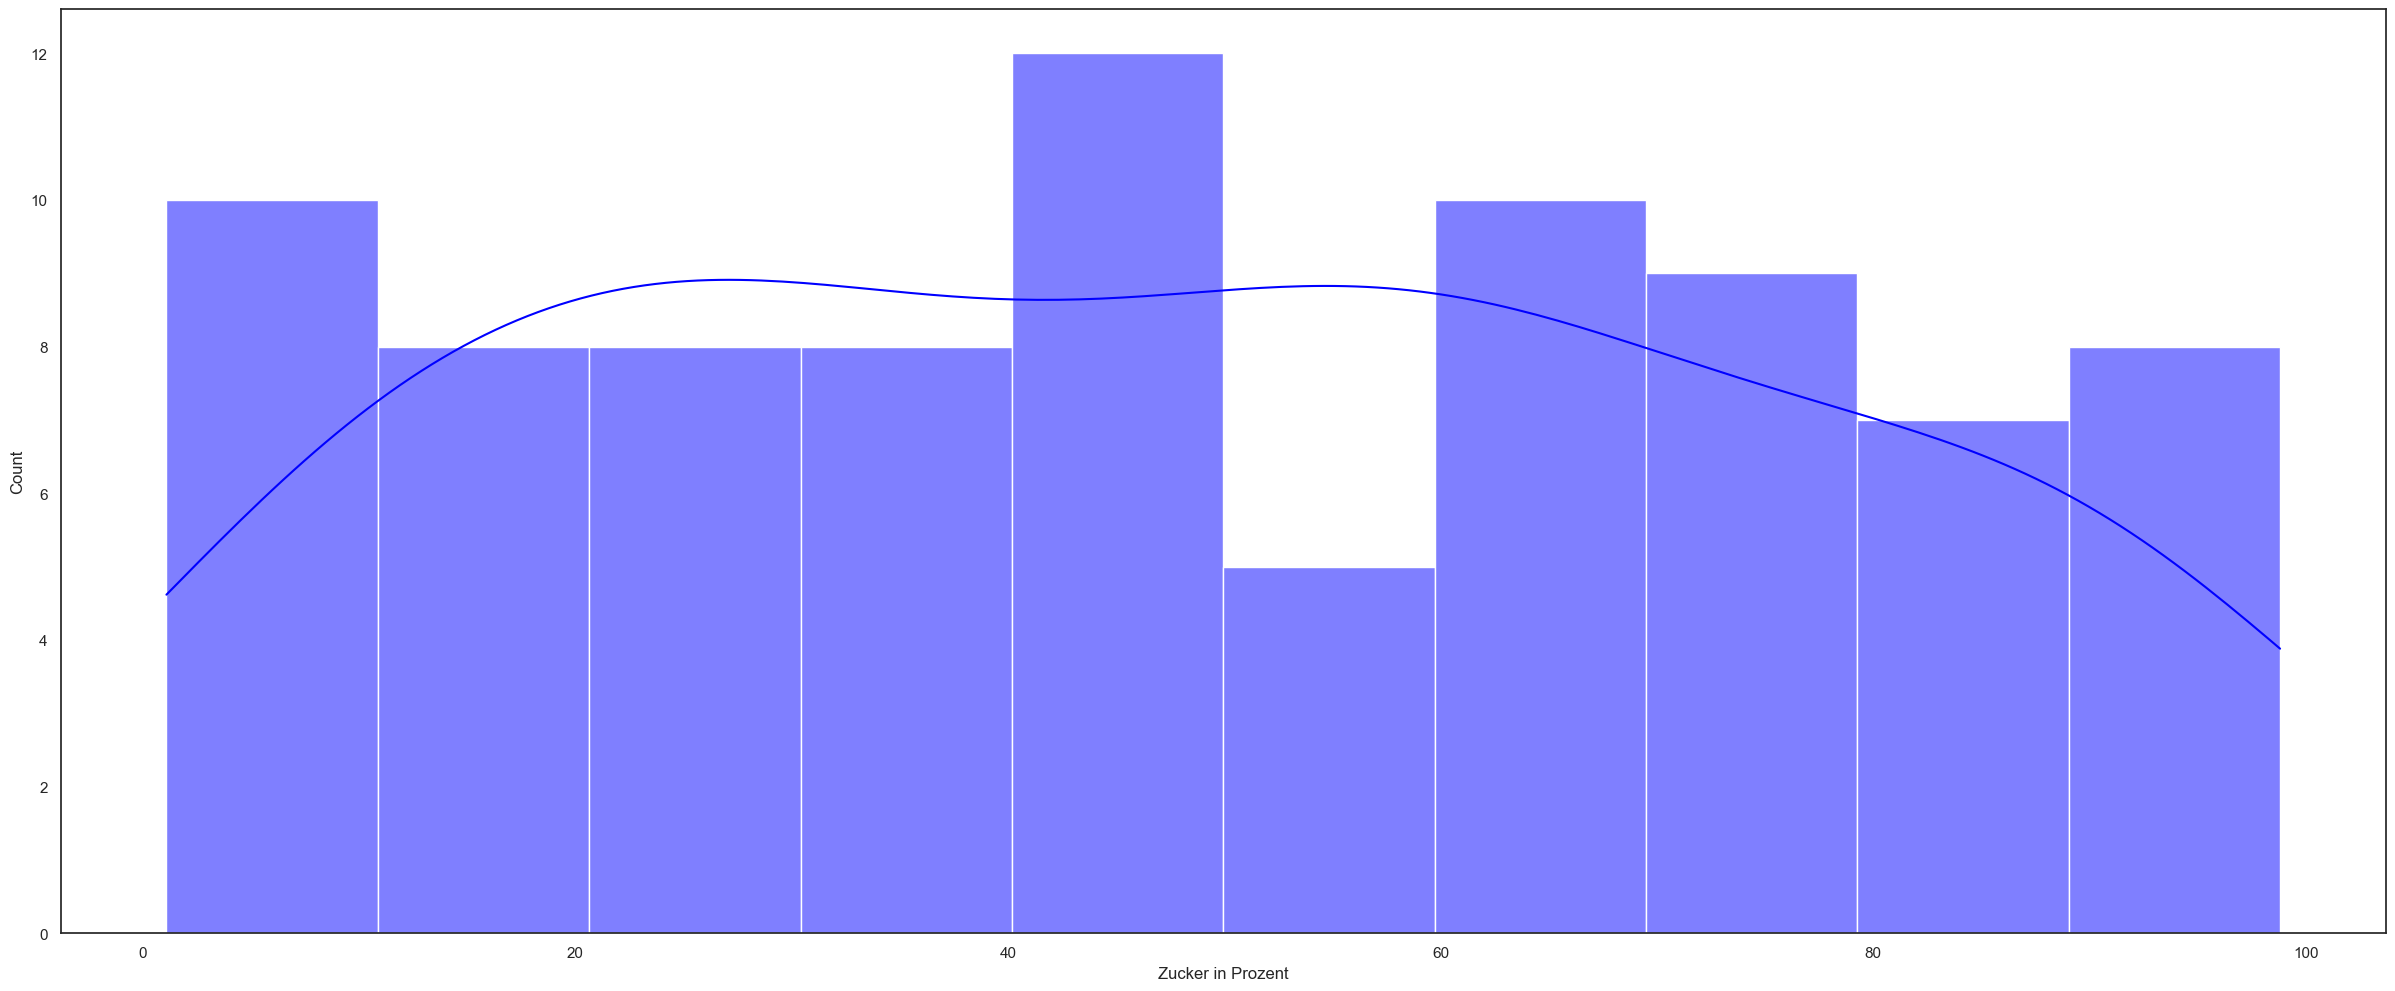

In [15]:
sns.histplot(data=df, x='sugarpercent', color=taste_color[0], bins='sqrt', kde=True)
plt.xlabel("Zucker in Prozent")
plt.show()

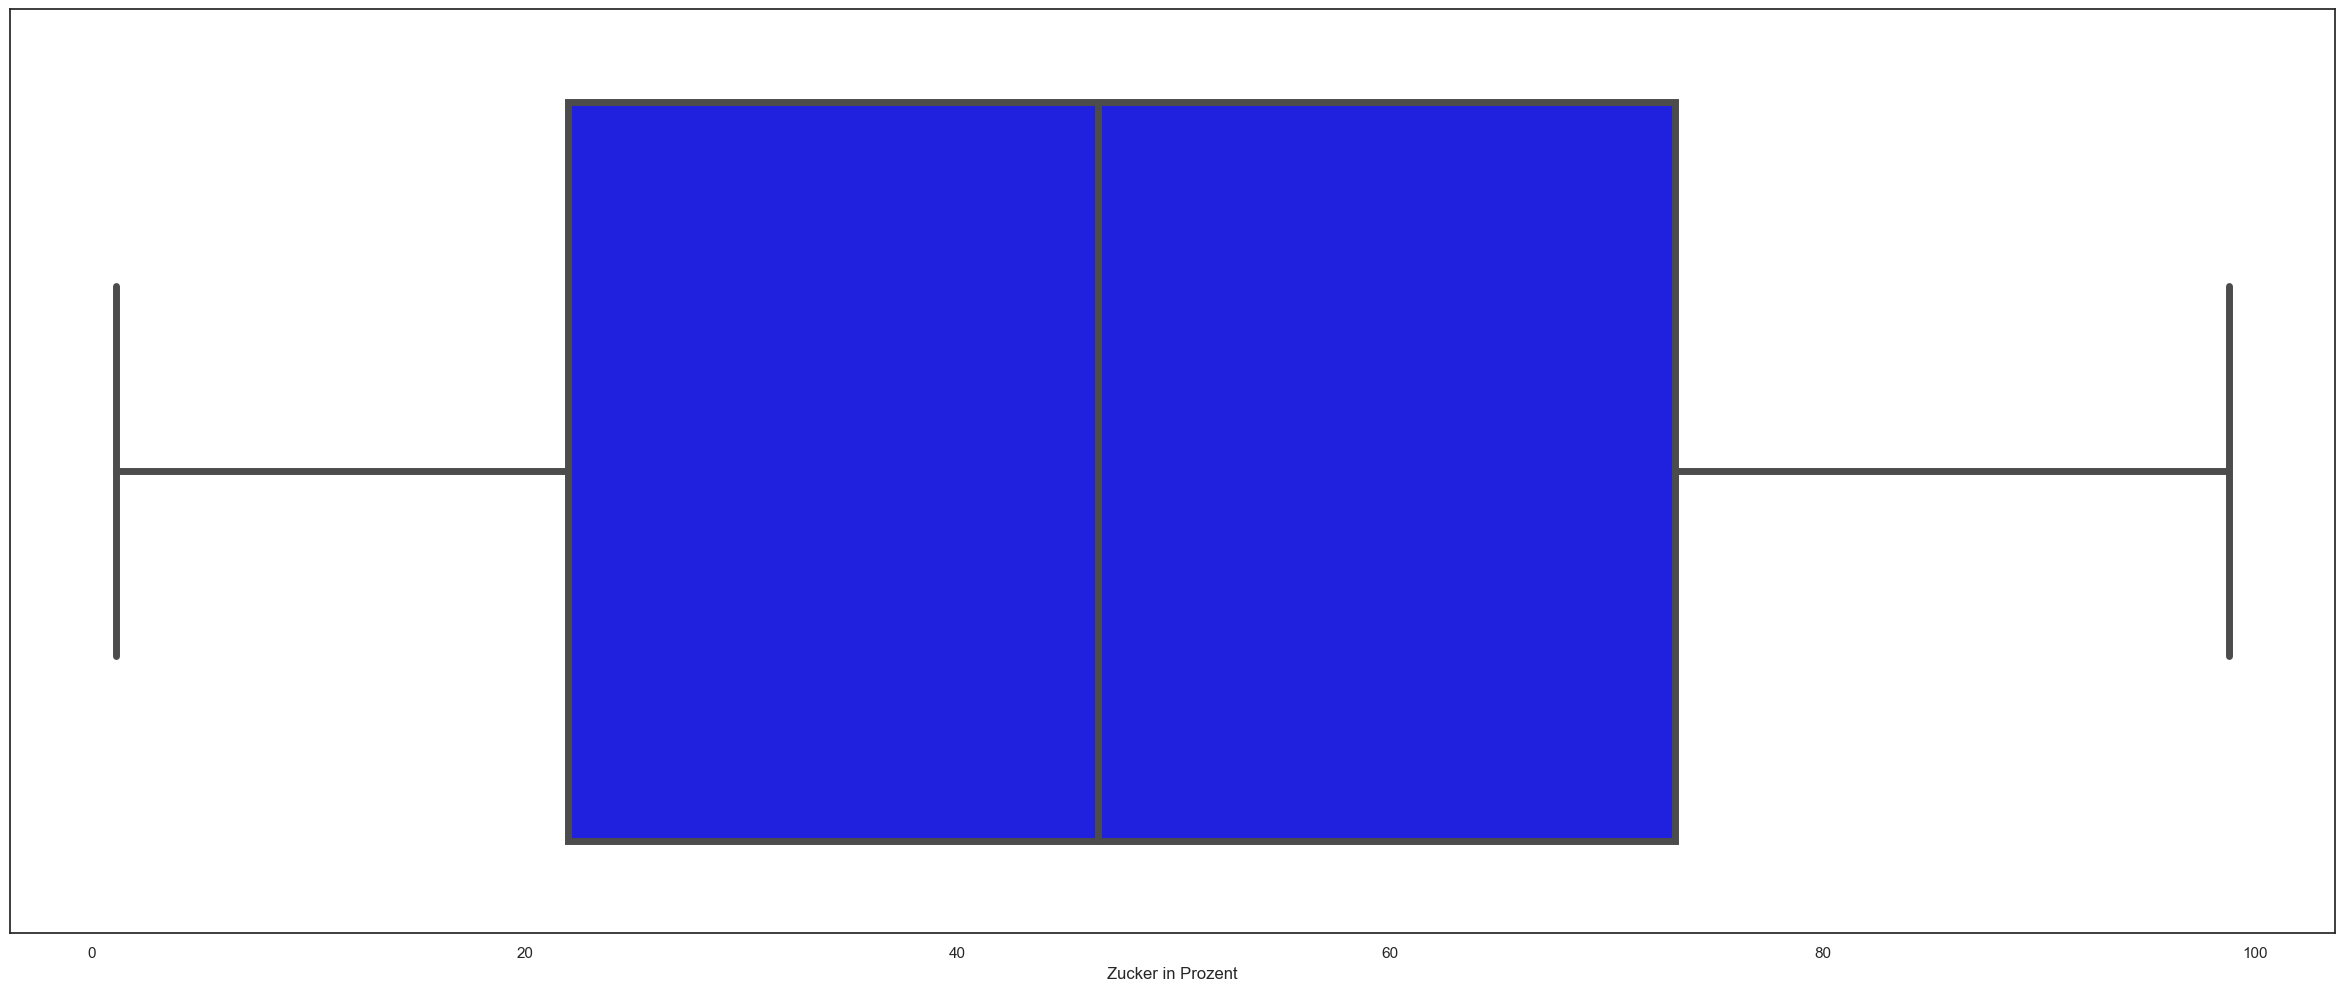

In [16]:
sns.boxplot(data=df, x='sugarpercent', color=taste_color[0], linewidth=5)
plt.xlabel("Zucker in Prozent")
plt.show()

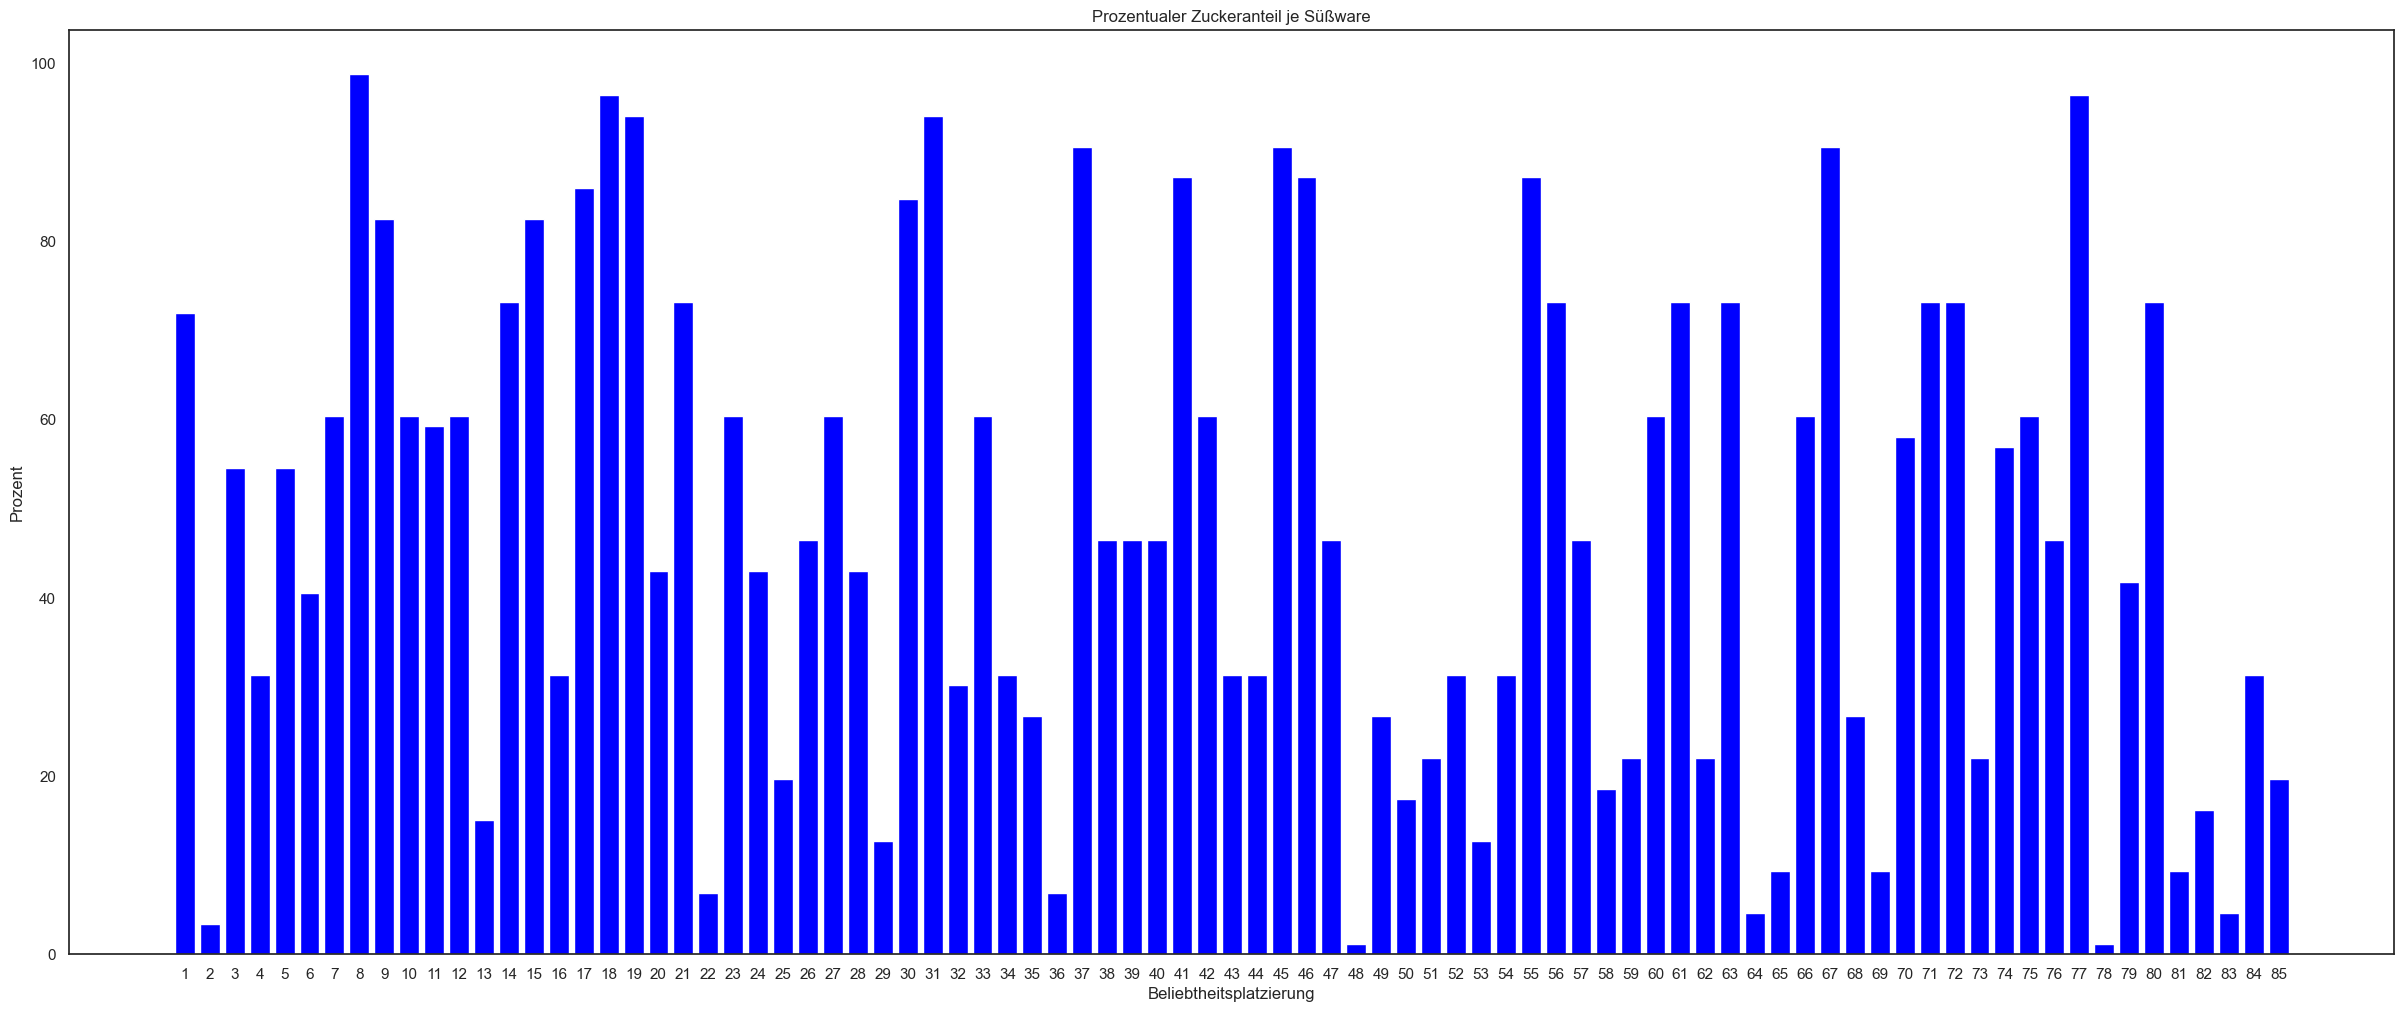

In [17]:
plt.bar(x=df.ranking, height=df.sugarpercent, color=taste_color[0])
plt.xticks(df.ranking)
plt.xlabel("Beliebtheitsplatzierung")
plt.ylabel("Prozent")
plt.title("Prozentualer Zuckeranteil je Süßware")
plt.show()

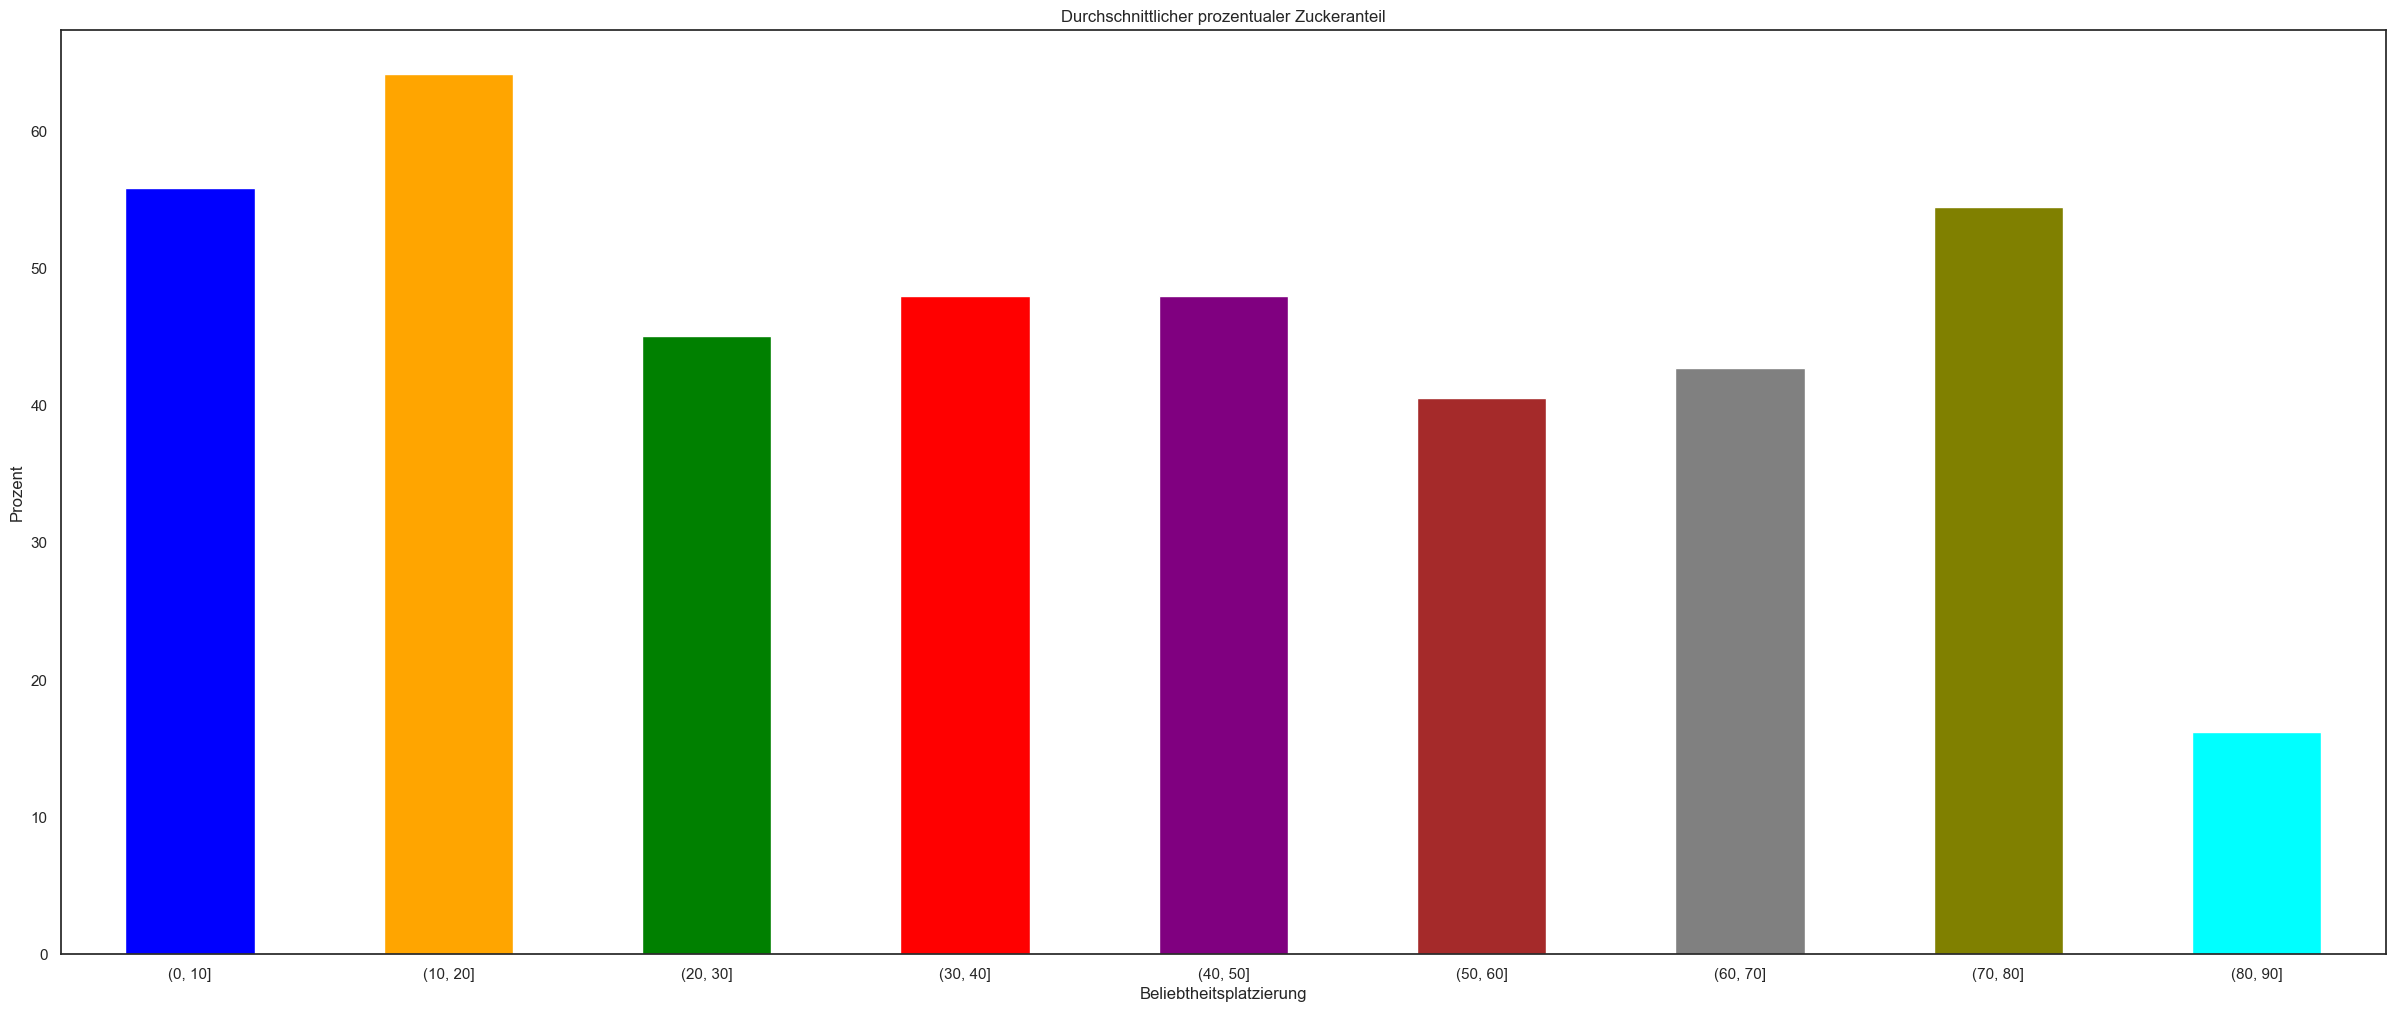

In [18]:
df_sugar_grouped = df['sugarpercent'].groupby(pd.cut(df['ranking'], bins)).mean()

sugar_color = taste_color + shape_color
df_sugar_grouped.plot(kind='bar', color=sugar_color)
plt.xticks(rotation=0)
plt.xlabel("Beliebtheitsplatzierung")
plt.ylabel("Prozent")
plt.title("Durchschnittlicher prozentualer Zuckeranteil")
plt.show()

In [19]:
df_sugar = df.sort_values(by='sugarpercent')
df_sugar['sugar_ranking'] = range(1, df_sugar.shape[0]+1)
df_sugar = df_sugar.reset_index(drop=True)
#df_sugar['ranking_diff'] = df_sugar.sugar_ranking - df_sugar.ranking
#df_sugar['ranking_diff'].plot(kind='bar')
#plt.xticks(df_sugar.sugar_ranking)
df_sugar

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,ranking,sugar_ranking
0,One dime,0,0,0,0,0,0,0,0,0,1.100000,11.600000,32.261086,78,1
1,One quarter,0,0,0,0,0,0,0,0,0,1.100000,51.099998,46.116505,48,2
2,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,3.400000,27.900001,81.866257,2,3
3,Chiclets,0,1,0,0,0,0,0,0,1,4.600000,32.499999,24.524988,83,4
4,Lemonhead,0,1,0,0,0,0,1,0,0,4.600000,10.400000,39.141056,64,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Skittles original,0,1,0,0,0,0,0,0,1,94.099998,22.000000,63.085140,19,81
81,Skittles wildberry,0,1,0,0,0,0,0,0,1,94.099998,22.000000,55.103695,31,82
82,Sugar Babies,0,0,1,0,0,0,0,0,1,96.499997,76.700002,33.437550,77,83
83,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,96.499997,86.000001,64.353340,18,84


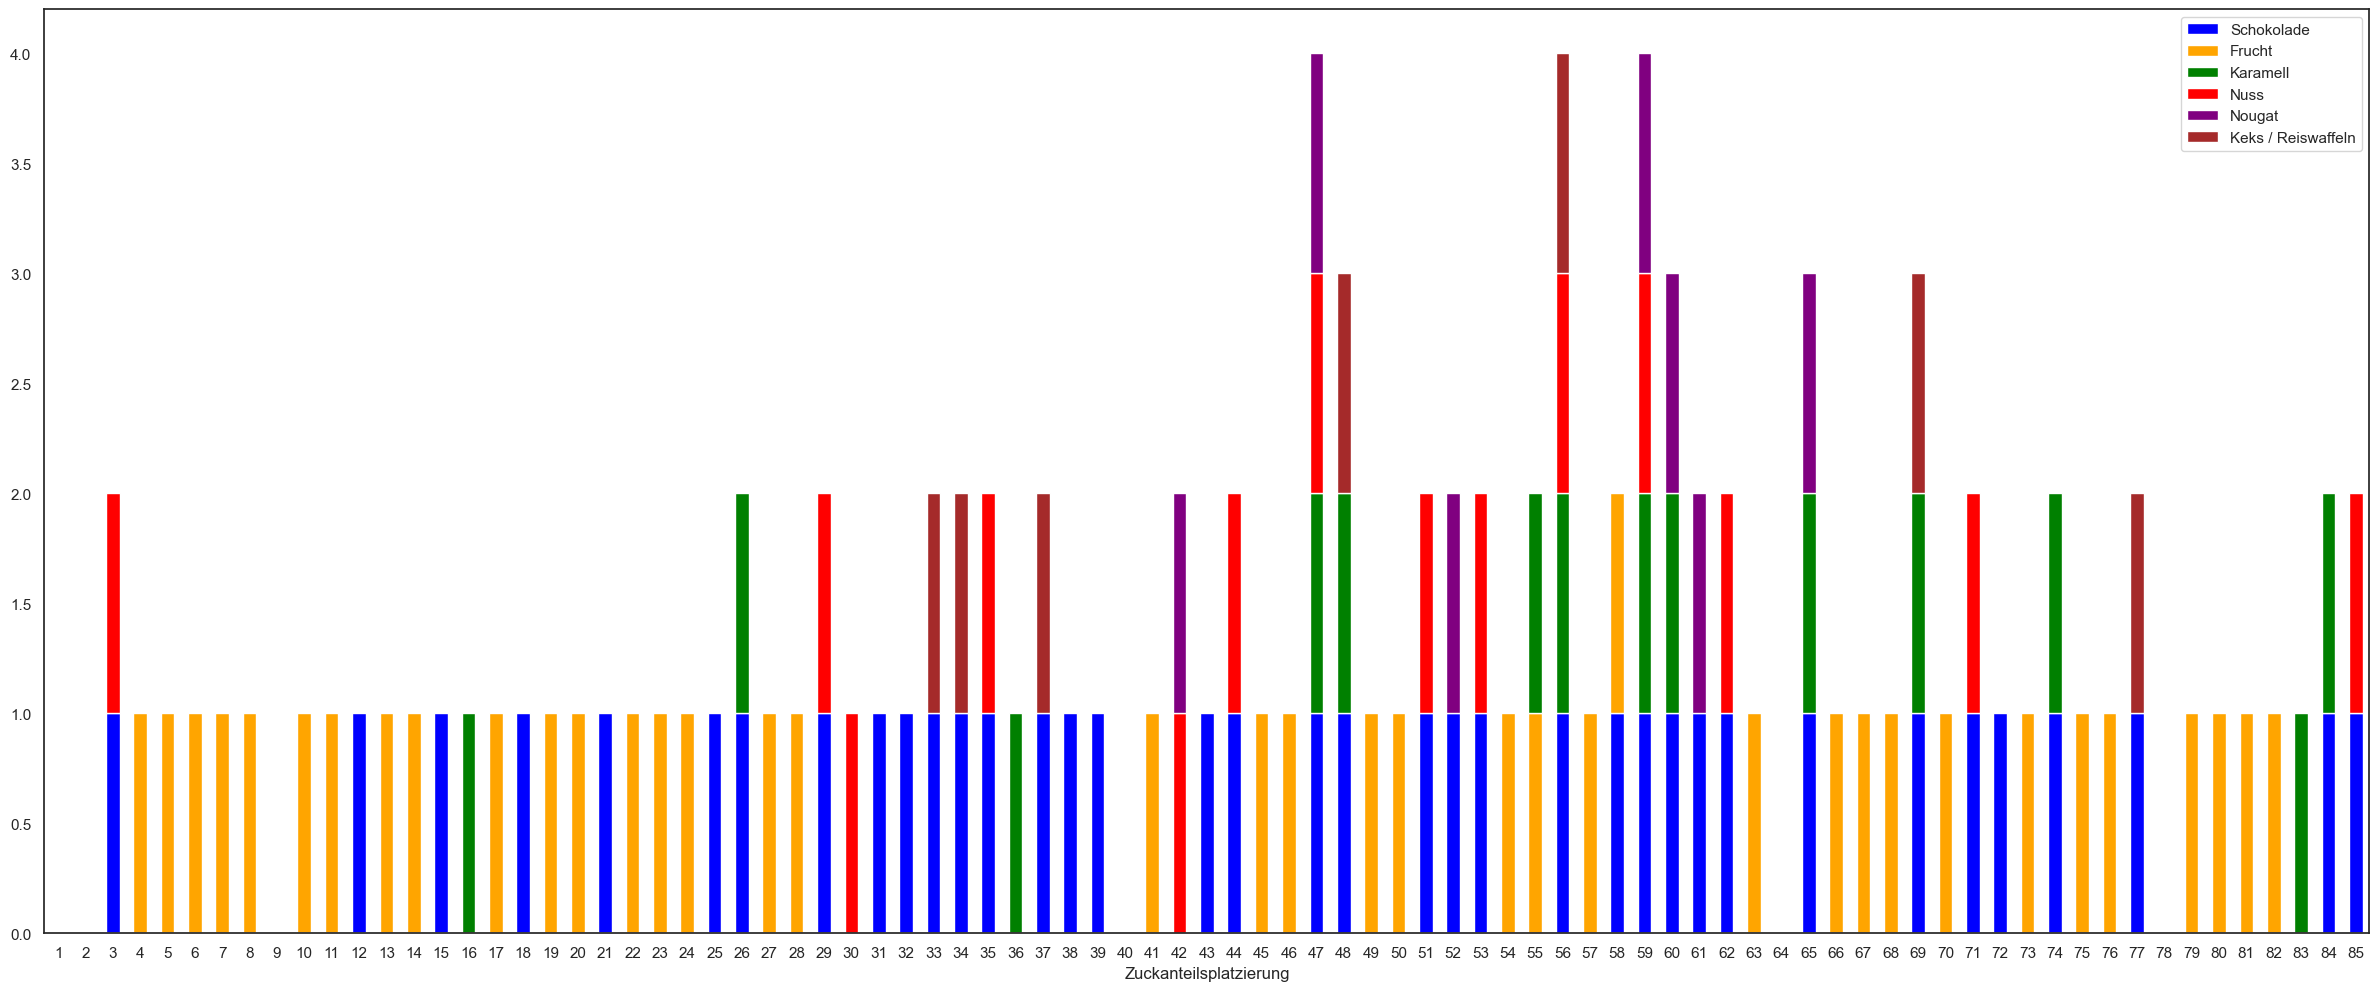

In [20]:
df_sugar[taste_cols + ['sugar_ranking']].plot(kind='bar', x='sugar_ranking', stacked=True, color=taste_color)
plt.xticks(rotation=0)
plt.xlabel("Zuckanteilsplatzierung")
plt.legend(taste_leg)
plt.show()

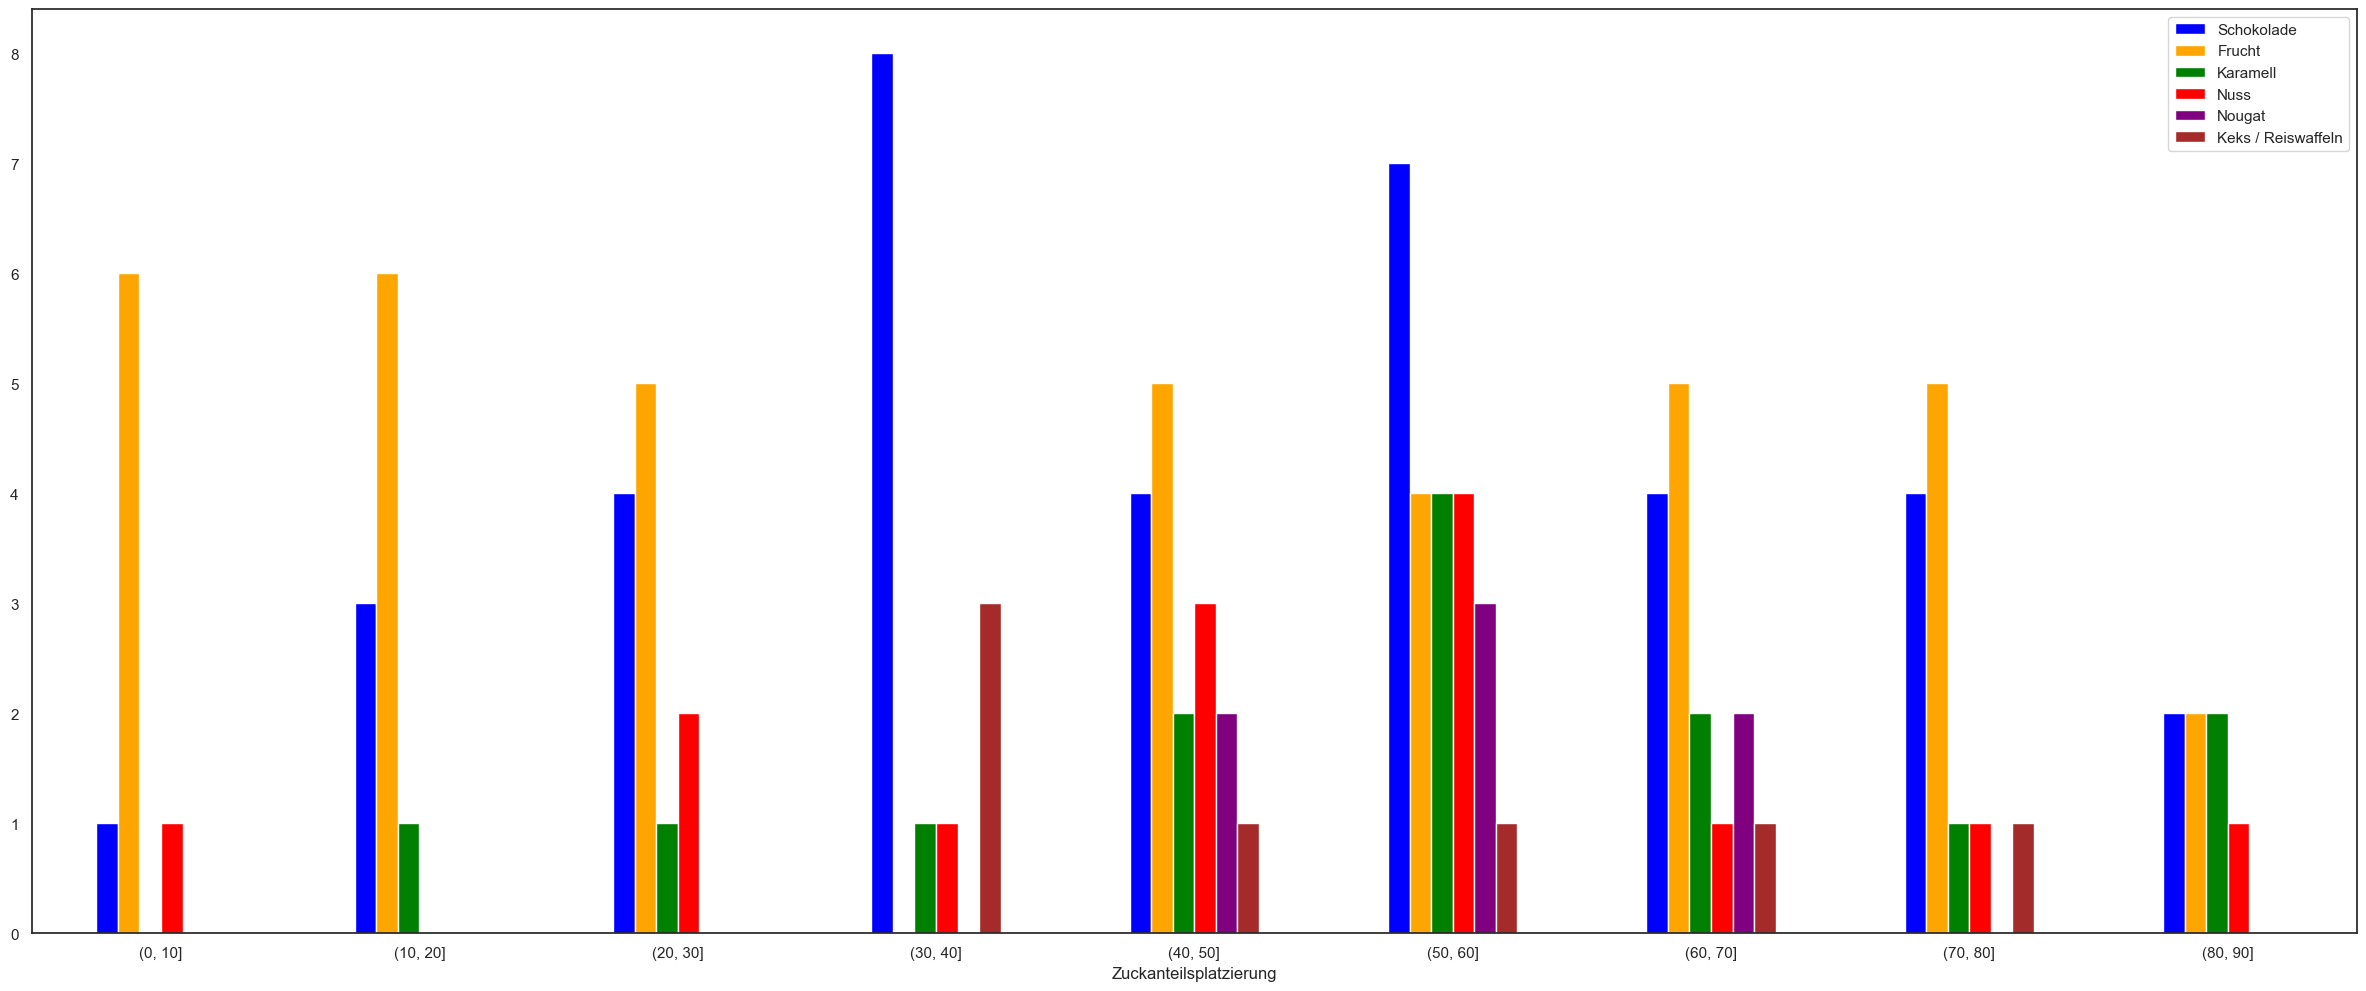

In [21]:
drop_cols = shape_cols + ['sugar_ranking', 'ranking', 'sugarpercent', 'pricepercent', 'winpercent']
df_sugar_shape_grouped = df_sugar.groupby(pd.cut(df_sugar['sugar_ranking'], bins)).sum()
df_sugar_shape_grouped = df_sugar_shape_grouped.drop(drop_cols, axis=1)

df_sugar_shape_grouped.plot(kind='bar', color=taste_color)
plt.xticks(rotation=0)
plt.xlabel("Zuckanteilsplatzierung")
plt.legend(taste_leg)
plt.show()

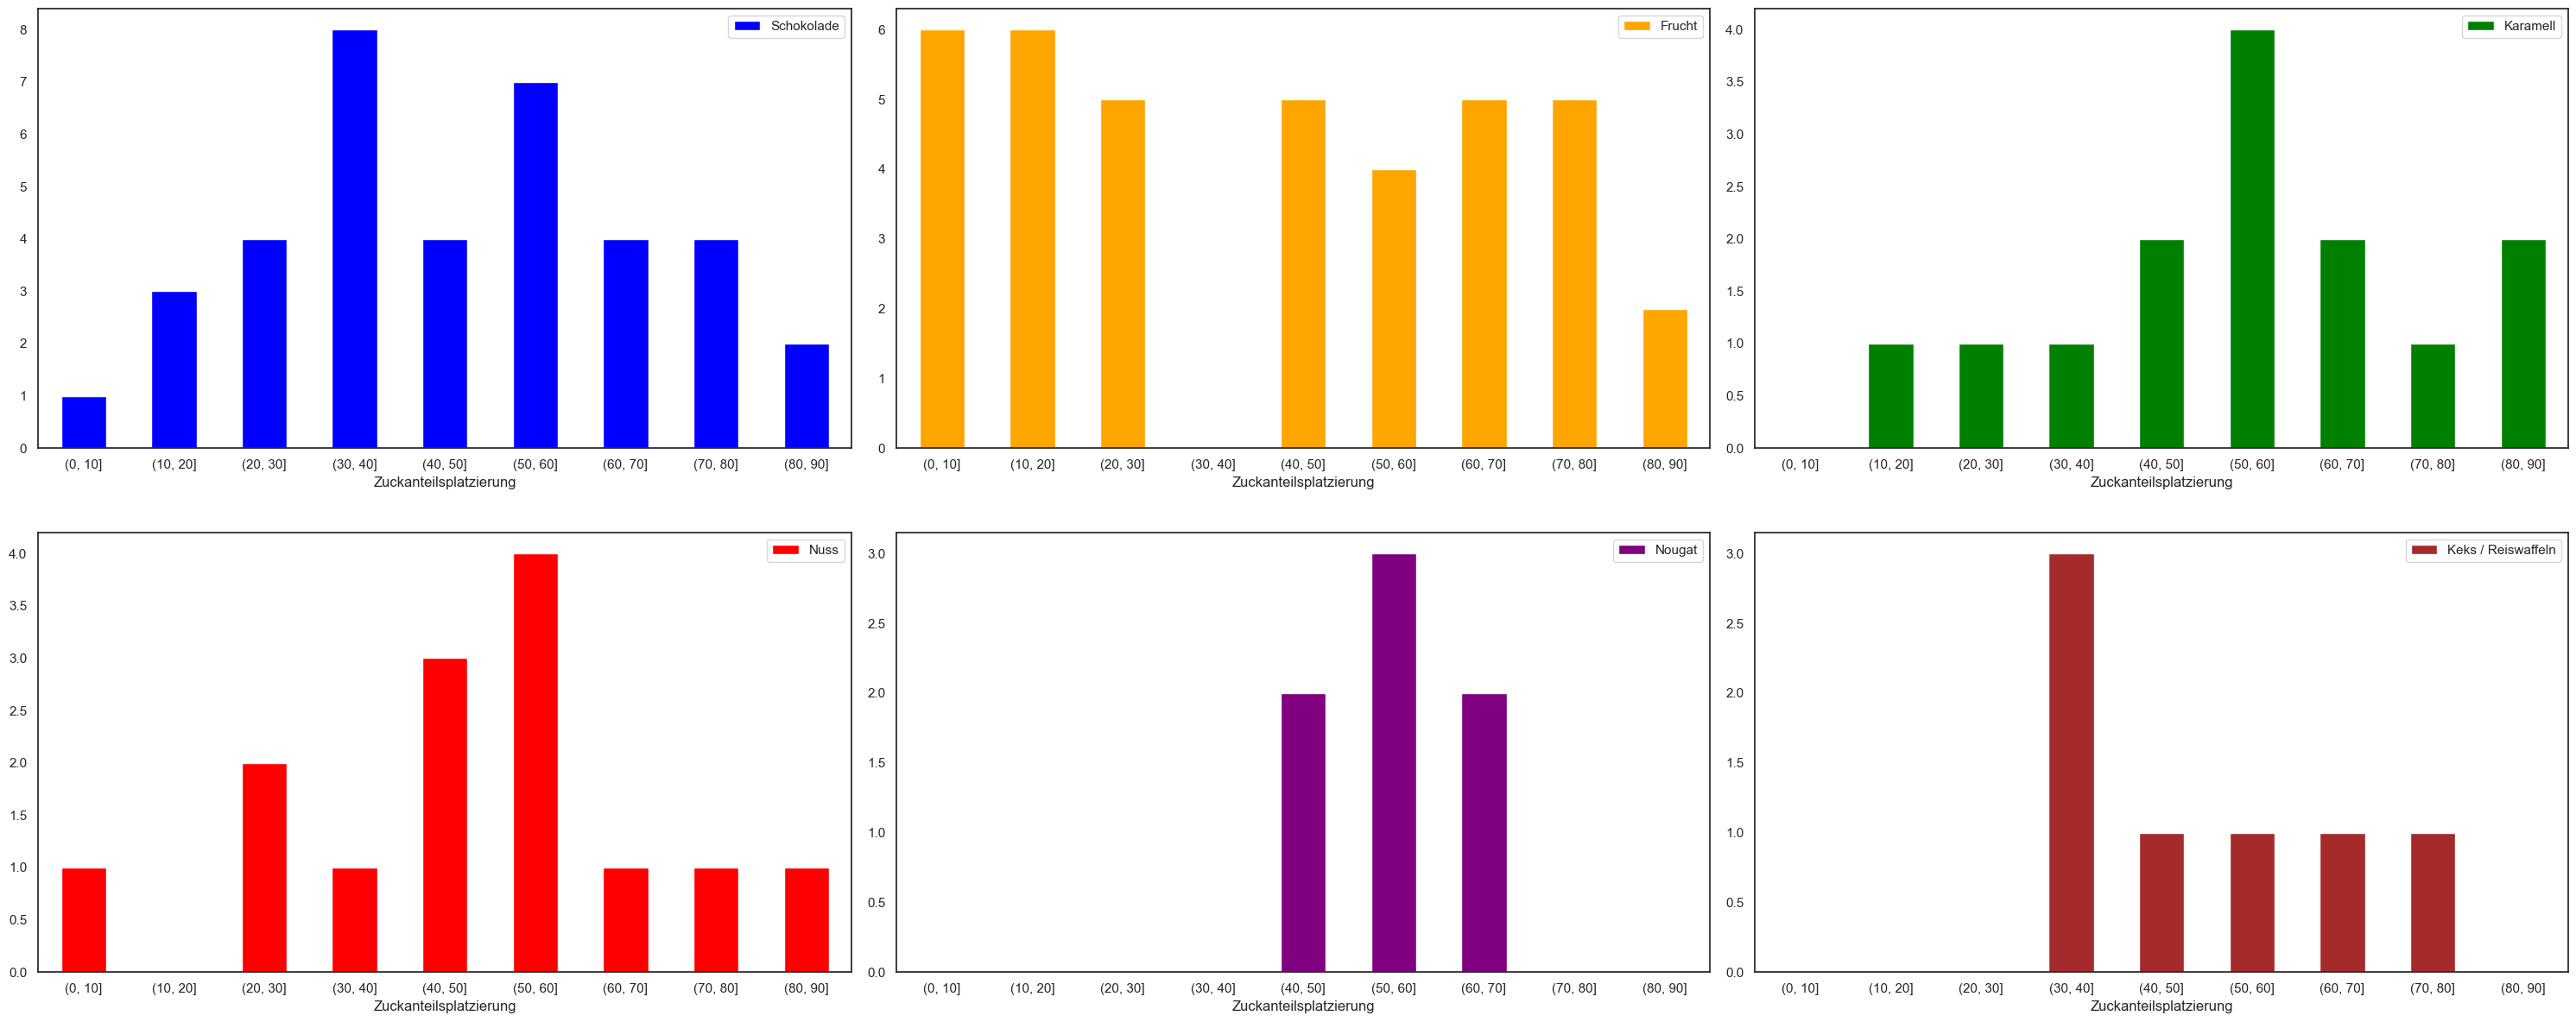

In [22]:
for index, col in enumerate(taste_cols):
    ax = plt.subplot(2, 3, index+1)
    df_sugar_shape_grouped[col].plot(kind='bar', color=taste_color[index], label=taste_leg[index])
    plt.xticks(rotation=0)
    plt.xlabel("Zuckanteilsplatzierung")
    plt.legend()
    
plt.tight_layout(h_pad=3)

# Preis

<AxesSubplot: xlabel='pricepercent', ylabel='Count'>

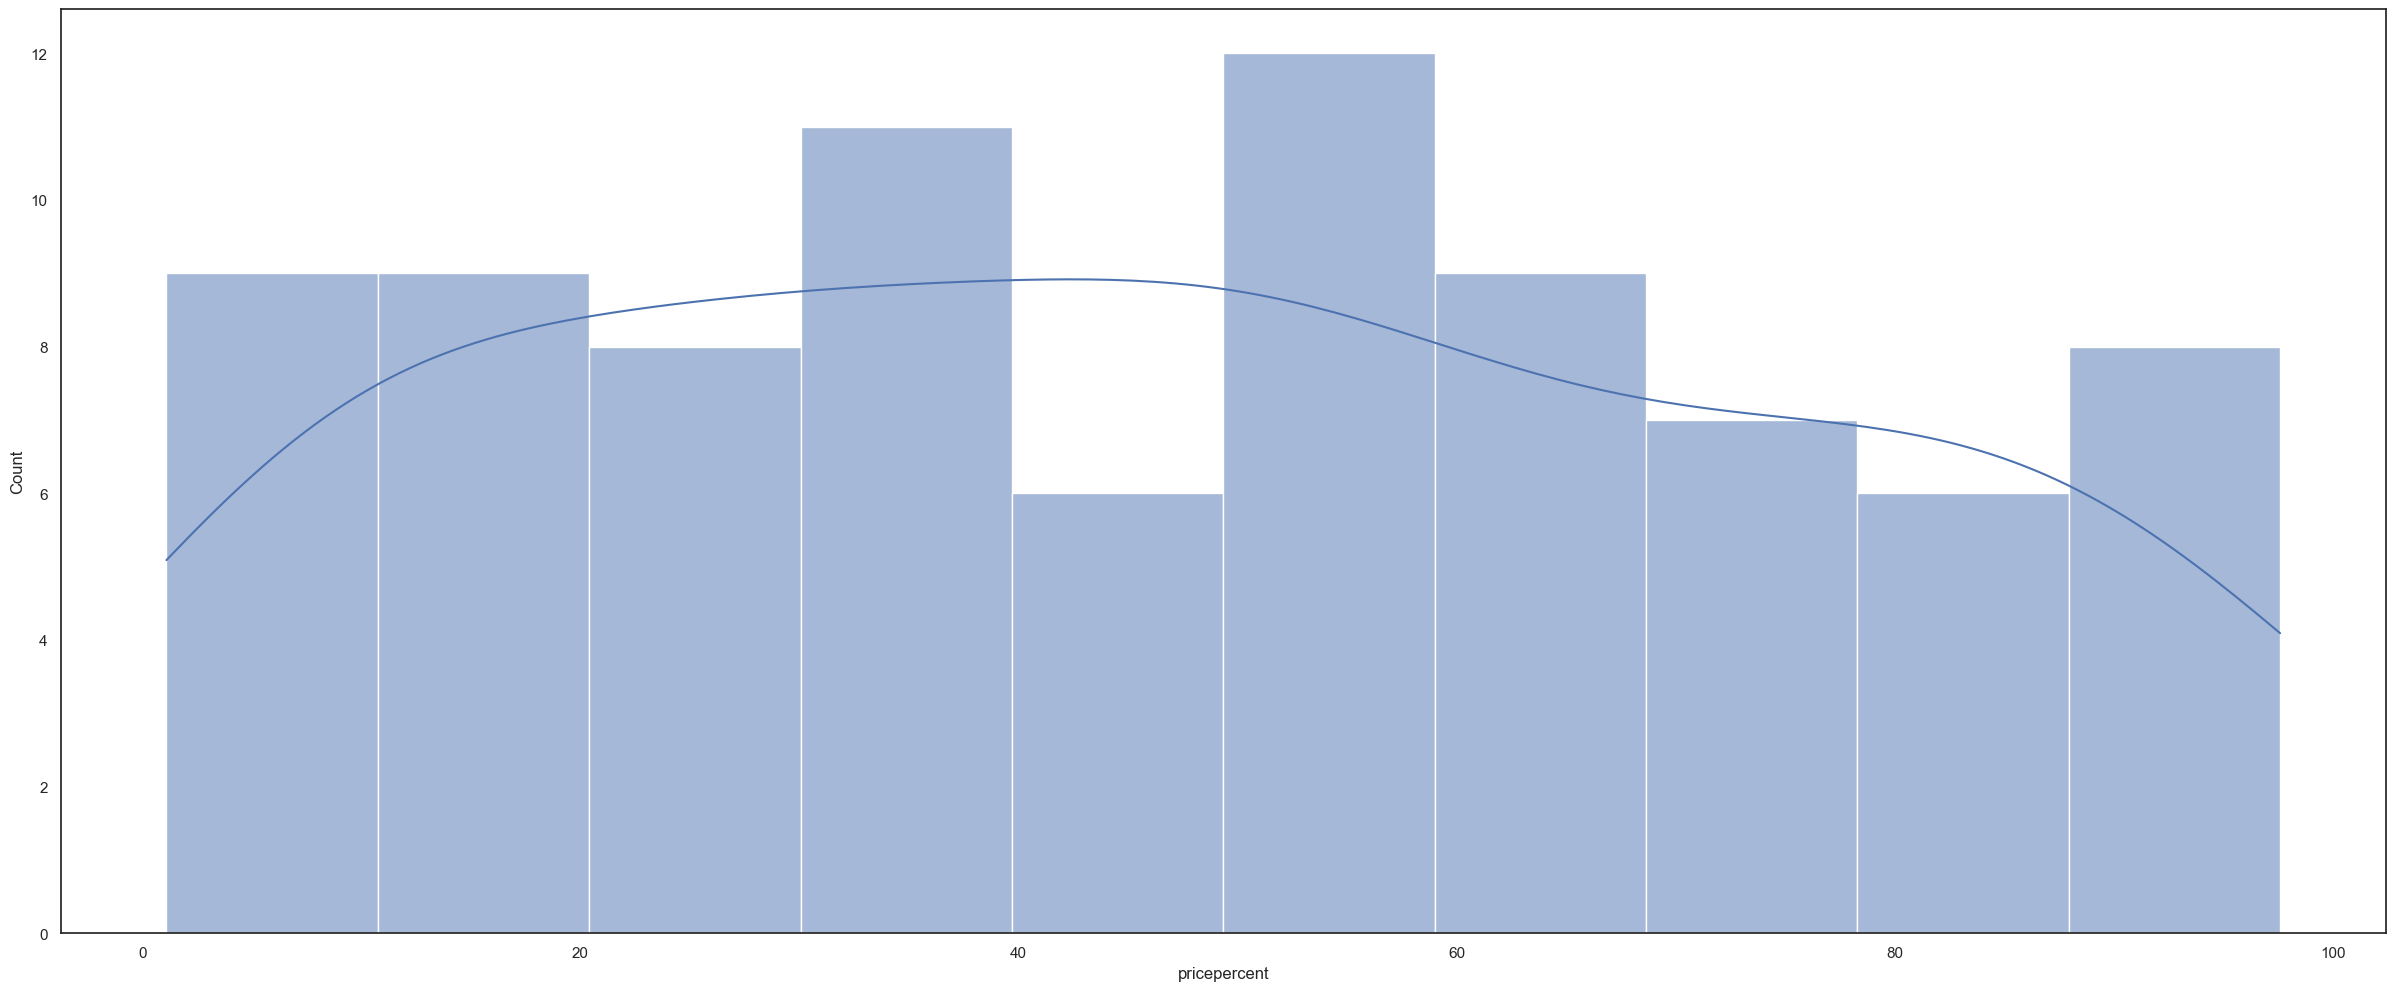

In [31]:
sns.histplot(data=df, x='pricepercent', bins='sqrt', kde=True)

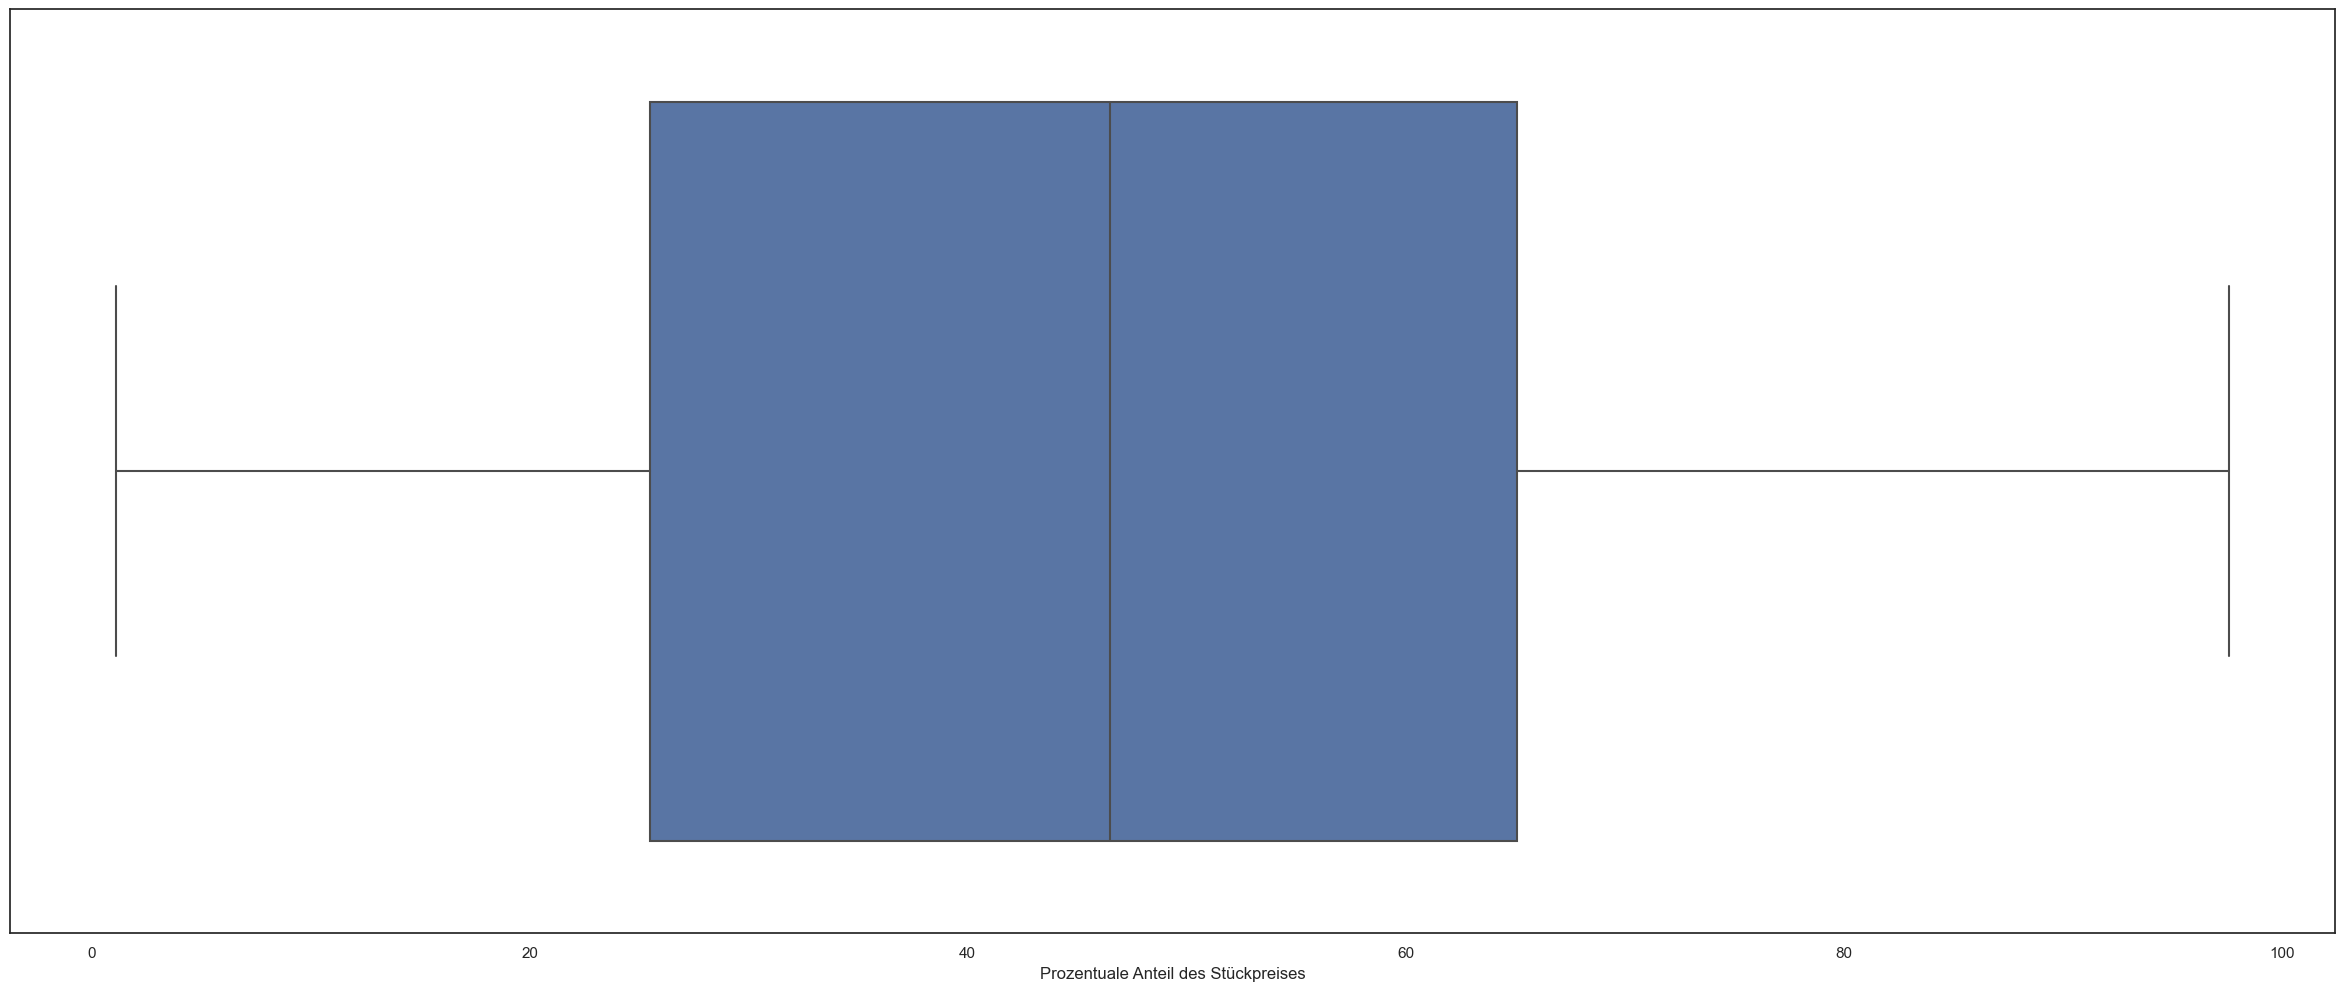

In [23]:
sns.boxplot(data=df, x='pricepercent')
plt.xlabel("Prozentuale Anteil des Stückpreises")
plt.show()